In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/scripts

/content/drive/MyDrive/Colab Notebooks/scripts


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import os
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
from feature_selection import forwardFeatureSelection

from GenLinCFA import GenLinCFA

from aux_GenLinCFA import *

In [ ]:
cd ..

/content/drive/MyDrive/Colab Notebooks


In [30]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5, sample=0):
  x = []
  y = []
  fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(9, 9), constrained_layout=True)
  fig.suptitle(basin + ' shuffling num. ' + str(sample) + ' standardized target, moving avg 2 weeks', fontsize=12)
  for j in range(0, 2):
    for i in range(0,5): 
      ax[i][j].set_xlim(xmin,xmax)
      ax[i][j].set_ylim(ymin,ymax)
  
  cmap = plt.get_cmap('rainbow')
  selected_colnames_nocoord = [feature.rsplit('_', 1)[0] for feature in selected_colnames]

  for i in range(len(selected_colnames)):
    # iterate over all the features aggregations
    for k in range (len(output)):

      # print only the aggregations of the chosen features
      if output[k][0][0].split('_')[0].replace("-", "_" ) == selected_colnames_nocoord[i]:
        #print ("Found feature ", selected_colnames_nocoord[i])
       
        for j in range (len(output[k])):       # j iterates all the clusters
          #colors = cm.rainbow(np.linspace(0,1,len(output[k])))
          #np.random.shuffle(cm)
          x = []
          y = []
          for datum in output[k][j]:
              x.append(float(datum.split('_')[1]))
              #print(float(datum.split('_')[1]))
              y.append(float(datum.split('_')[2]))
              #print(float(datum.split('_')[2]))

          ax[i][0].scatter(x,y,color=cmap(1.*j/len(output[k]))) # ax[i][0].scatter(x,y,color=colors[j])
          ax[i][0].set_title(selected_colnames_nocoord[i] + '_all_aggreg', fontsize = 9)

  #col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
  for i in range(len(selected_colnames)):
    for k in range(0, len(output)):
      if output[k][0][0].split('_')[0].replace("-", "_" ) == selected_colnames_nocoord[i]:
        # print ("Found feature ", output[k][0][0].split('_')[0].replace("-", "_" ))
        x = []
        y = []
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[k][idx]:
          x.append(float(datum.split('_')[1]))
          y.append(float(datum.split('_')[2]))
        ax[i][1].scatter(x,y,color=cmap(1.*i/len(selected_colnames)))
        ax[i][1].set_title(selected_colnames_nocoord[i] + '_chosen_aggreg', fontsize = 9)

# Single task, standardized target, changing aggregations

In [ ]:
### original targets
basins = ['Emiliani1','Emiliani2','Garda_Mincio']
path_orig_targets = './csv/'

targets_df_train = pd.DataFrame()
targets_df_val = pd.DataFrame()
targets_df_test = pd.DataFrame()
targets_df_trainVal = pd.DataFrame()

for basin in basins:
    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target_binary('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', 
          path=path_orig_targets+basin+'.csv', threshold = None, nopeaks = False)
    targets_df_test[basin] = target_df_test['mean_std']
    targets_df_train[basin] = target_df_train['mean_std']
    targets_df_val[basin] = target_df_val['mean_std']
    targets_df_trainVal[basin] = pd.concat([targets_df_train[basin], targets_df_val[basin]])

In [ ]:
def get_features (path_features, basin, train_name, val_name, test_name):
  features_train = pd.read_csv(path_features + basin + train_name)
  features_valid = pd.read_csv(path_features + basin + val_name)
  features_test = pd.read_csv(path_features + basin + test_name)
  
  features_train_validation = pd.concat([features_train, features_valid])
  return features_train.values, features_valid.values, features_train_validation.values, features_test.values

In [ ]:
basin = 'Garda_Mincio'
# Temp Prec
path_features = './GenLinCFA/temp_prec_shuffle/'

X_train_CMI5 = pd.read_csv(path_features + basin + '_2_genLinCFA_best5_CMI_train.csv')
X_validation_CMI5 = pd.read_csv(path_features + basin + '_2_genLinCFA_best5_CMI_val.csv')
X_test_CMI5 = pd.read_csv(path_features + basin + '_2_genLinCFA_best5_CMI_test.csv')

X_train_validation_CMI5 = pd.concat([X_train_CMI5, X_validation_CMI5])

In [ ]:
X_train_CMI5

cyclostationary_mean_rr_2  cyclostationary_mean_rr_4  \
0                     0.541979                   0.505671   
1                     0.316201                   0.698338   
2                     0.264405                   0.476397   
3                     0.007102                  -0.139945   
4                     0.463548                   0.317825   
..                         ...                        ...   
406                  -0.649312                  -0.622403   
407                   1.034702                   0.829001   
408                  -0.034731                  -0.161888   
409                   0.027470                  -0.248898   
410                  -0.211322                  -0.754867   

     cyclostationary_mean_rr_8w_2  cyclostationary_mean_tg_2  \
0                        2.179835                  -0.983134   
1                        1.389995                   0.280763   
2                        0.740616                  -1.926100   
3                        0.383938                   0.101593   
4                        0.388228                  -1.622078   
..                            ...                        ...   
406                     -0.074410                   1.766711   
407                      0.109535                  -0.119232   
408                      0.347053                   0.679354   
409                      0.405143                  -2.966847   
410                      0.395290                   0.122742   

     cyclostationary_mean_tg_12w_0  
0                         0.623122  
1                         1.548067  
2                         0.475094  
3                         0.683135  
4                         0.451174  
..                             ...  
406                       1.201941  
407                       1.055389  
408                       0.953166  
409                       0.535156  
410                       0.373552  

[411 rows x 5 columns]

In [ ]:
basin = 'Emiliani1'
plots_folder = './GenLinCFA/for_plots/'
train_val_features = pd.read_csv(plots_folder + basin + '_trainVal_aggreg_3')
test_features = pd.read_csv(plots_folder + basin + 'test_aggreg_3')

In [ ]:
outputs[2][7]

In [ ]:
# attempt replacing 'cyclostationary_mean_tg_3' (isolated point) with 'cyclostationary_mean_tg_0' (big aggregation)
X_train_validation_CMI5['cyclostationary_mean_tg_2'] = train_val_features['cyclostationary_mean_tg_0']
X_test_CMI5['cyclostationary_mean_tg_2'] = test_features['cyclostationary_mean_tg_0']

In [ ]:
# attempt replacing 'cyclostationary_mean_tg_3' (isolated point) with 'cyclostationary_mean_tg_0' (big aggregation)
X_train_validation_CMI5['cyclostationary_mean_rr_24w_1'] = train_val_features['cyclostationary_mean_rr_24w_0']
X_test_CMI5['cyclostationary_mean_rr_24w_1'] = test_features['cyclostationary_mean_rr_24w_0']

In [ ]:
X_train_validation_CMI5['cyclostationary_mean_rr_8w_2'] = train_val_features['cyclostationary_mean_rr_8w_0']
X_test_CMI5['cyclostationary_mean_rr_8w_2'] = test_features['cyclostationary_mean_rr_8w_0']

In [ ]:
X_train_validation_CMI5['cyclostationary_mean_rr_2'] = train_val_features['cyclostationary_mean_rr_0']
X_test_CMI5['cyclostationary_mean_rr_2'] = test_features['cyclostationary_mean_rr_0']
X_train_validation_CMI5['cyclostationary_mean_rr_4'] = train_val_features['cyclostationary_mean_rr_1']
X_test_CMI5['cyclostationary_mean_rr_4'] = test_features['cyclostationary_mean_rr_1']

In [ ]:
log_regr = LogisticRegression(solver='lbfgs', random_state = 42)

# CMI best 5
log_regr.fit(X_train_validation_CMI5, targets_df_trainVal[basin])
print("Train accuracy logistic regression CMI best 5: ", round(log_regr.score(X_train_validation_CMI5, targets_df_trainVal[basin]),3))
print("Test accuracy logistic regression CMI best 5: ", round(log_regr.score(X_test_CMI5, targets_df_test[basin]),3), "\n")

Train accuracy logistic regression CMI best 5:  0.704
Test accuracy logistic regression CMI best 5:  0.719 



In [ ]:
train_val_features

cyclostationary_mean_tg_0  cyclostationary_mean_tg_1  \
0                     0.699154                   0.265866   
1                     1.784773                   1.783134   
2                    -0.293747                  -1.462618   
3                     1.320041                   1.616298   
4                     0.089949                  -0.549161   
..                         ...                        ...   
634                   0.819044                   0.947576   
635                   1.245908                   1.150187   
636                   1.292887                   0.806180   
637                   1.306550                   1.497098   
638                   1.078605                   1.836127   

     cyclostationary_mean_tg_2  cyclostationary_mean_tg_3  \
0                     0.275179                   0.891629   
1                     1.440725                   1.341421   
2                    -1.539591                  -0.372093   
3                     1.363437                   1.024453   
4                    -0.786657                   0.055001   
..                         ...                        ...   
634                   0.761736                   1.051900   
635                   1.484088                   1.056688   
636                   0.492968                   1.188406   
637                   1.008022                   1.081451   
638                   1.939332                   0.597892   

     cyclostationary_mean_tg_1w_0  cyclostationary_mean_tg_1w_1  \
0                        0.834685                      0.331615   
1                        1.485555                      1.275999   
2                        0.890355                      0.200149   
3                        0.612349                      0.096306   
4                        0.842497                      0.664864   
..                            ...                           ...   
634                      1.877016                      1.761061   
635                      1.234670                      1.306351   
636                      1.517423                      1.218343   
637                      1.554759                      1.434268   
638                      1.428777                      2.075332   

     cyclostationary_mean_tg_1w_2  cyclostationary_mean_tg_1w_3  \
0                        0.411582                      0.194410   
1                        1.094695                      0.989054   
2                        0.010546                     -0.206048   
3                       -0.013728                     -0.301476   
4                        0.412380                      0.242725   
..                            ...                           ...   
634                      1.239880                      1.480746   
635                      1.473693                      1.210901   
636                      1.306075                      1.048255   
637                      0.832214                      1.119964   
638                      1.722203                      2.020160   

     cyclostationary_mean_tg_1w_4  cyclostationary_mean_tg_4w_0  ...  \
0                        1.063959                      1.091987  ...   
1                        1.332706                      1.954199  ...   
2                        0.577644                      1.140727  ...   
3                        0.388259                      1.374825  ...   
4                        0.643444                      1.124462  ...   
..                            ...                           ...  ...   
634                      2.099018                      1.314390  ...   
635                      1.258342                      1.101026  ...   
636                      1.339902                      1.954358  ...   
637                      1.354698                      2.210076  ...   
638                      1.001872                      1.817006  ...   

     cyclostationary_mean_rr_12w_1  cyclostationary_mean_rr_12w_

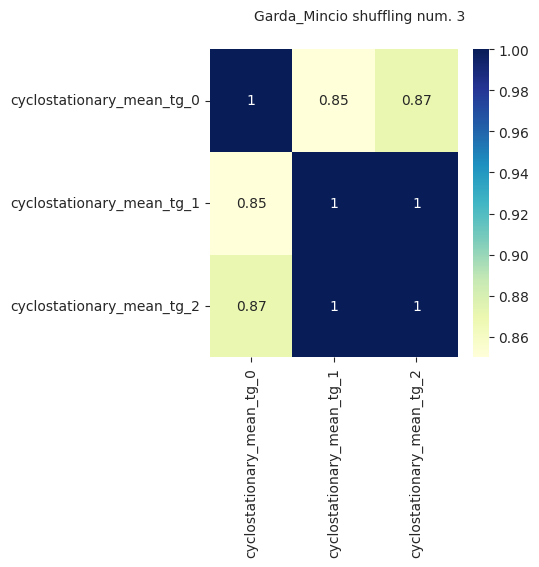

In [ ]:
import seaborn as sns

#cormat = train_val_features[train_val_features.filter(like='cyclostationary_mean_rr_8w_').columns].corr()
cormat = train_val_features.iloc[:,:3].corr()
fig, ax = plt.subplots(figsize=(4,4))
fig.suptitle(basin + ' shuffling num. 3', fontsize=10)
sns.heatmap(round(cormat,2), annot=True, ax=ax, cmap="YlGnBu")

ax.set_facecolor('white')
sns.set_style('ticks')

# Standardized target aggregations

In [ ]:
plots_folder = './GenLinCFA/for_plots/'
basin = "Emiliani1"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

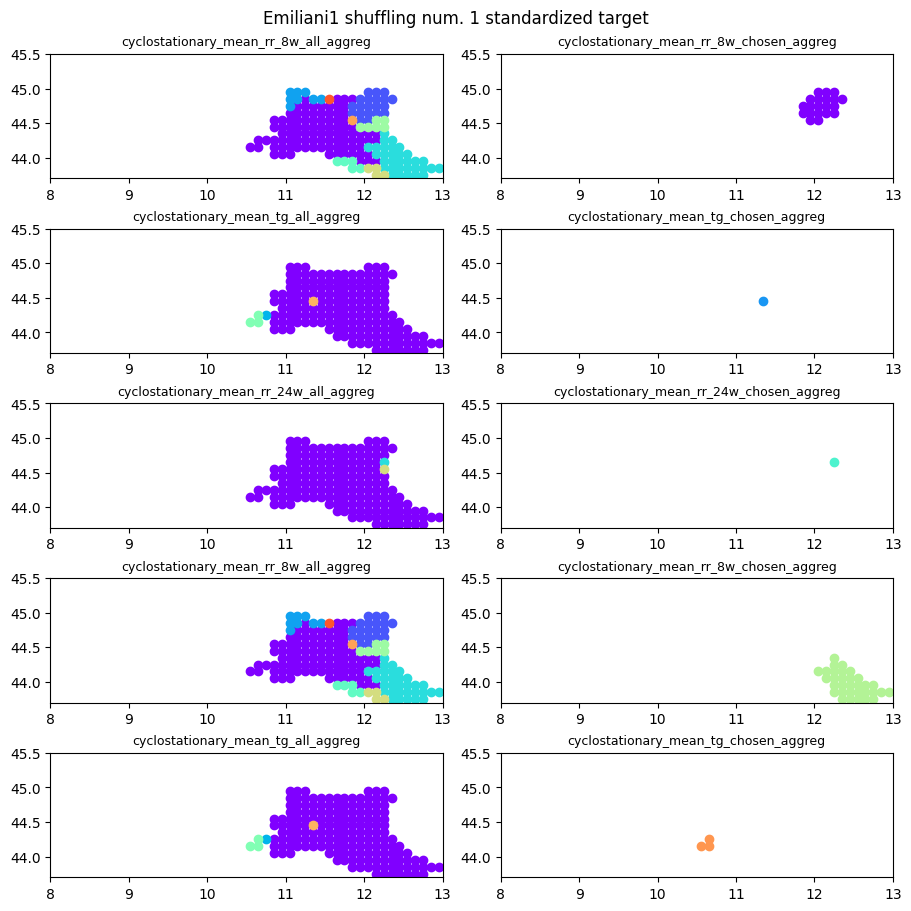

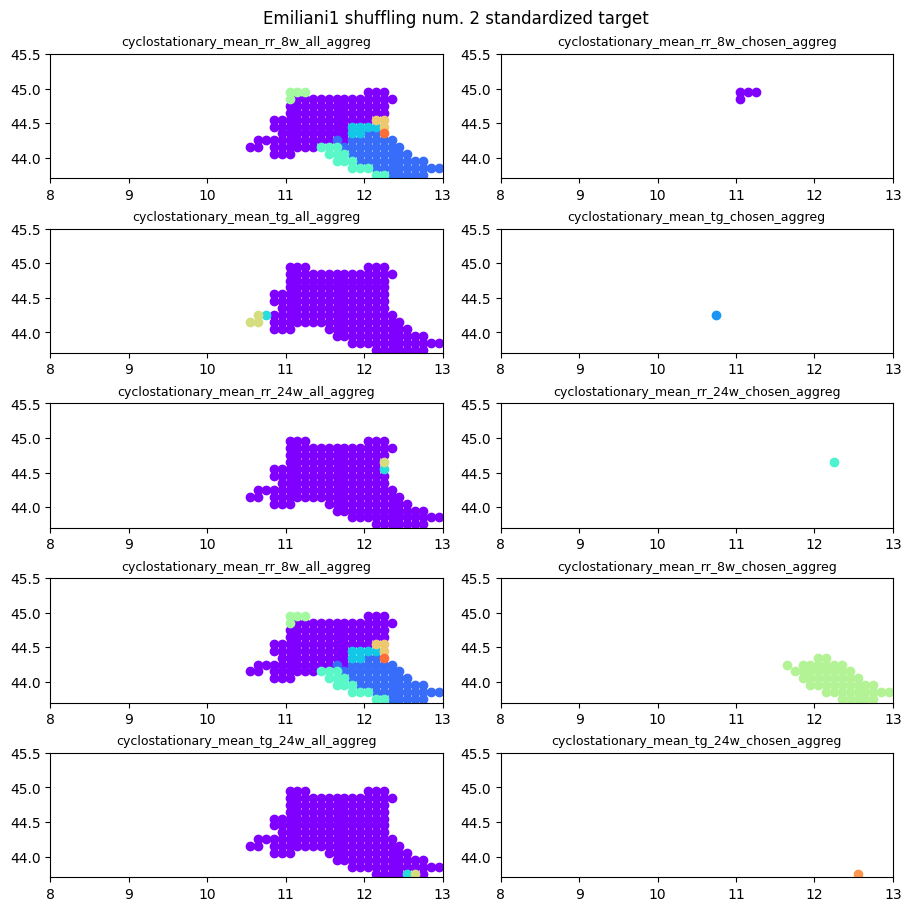

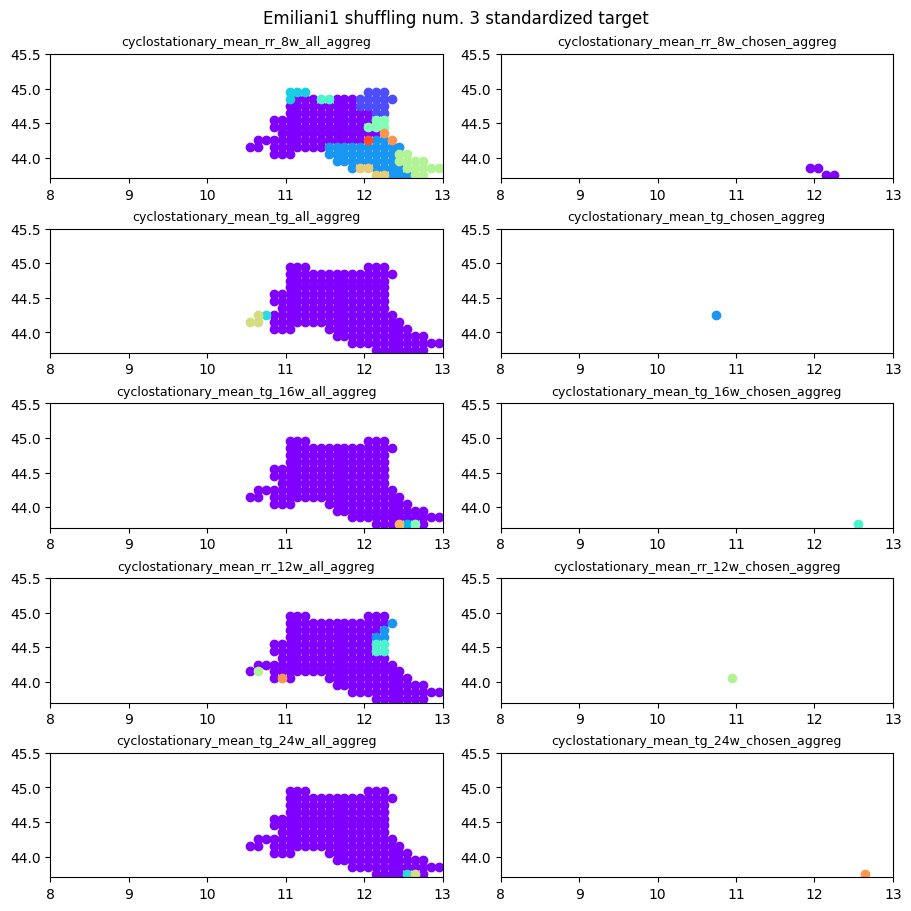

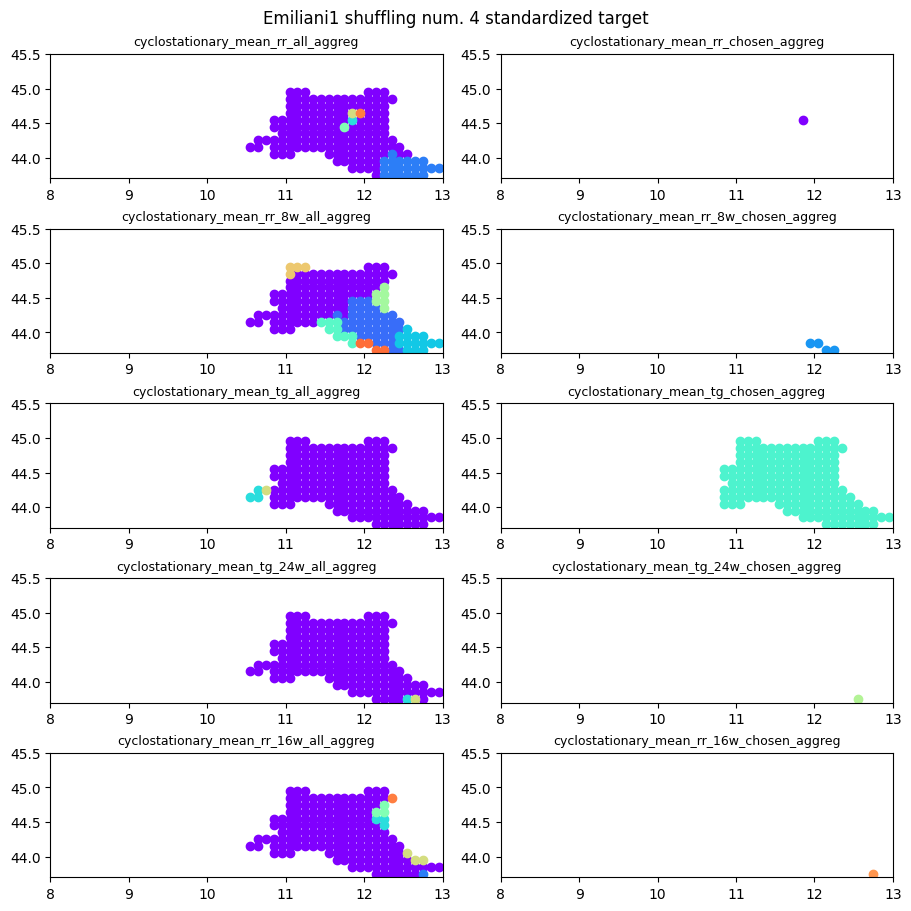

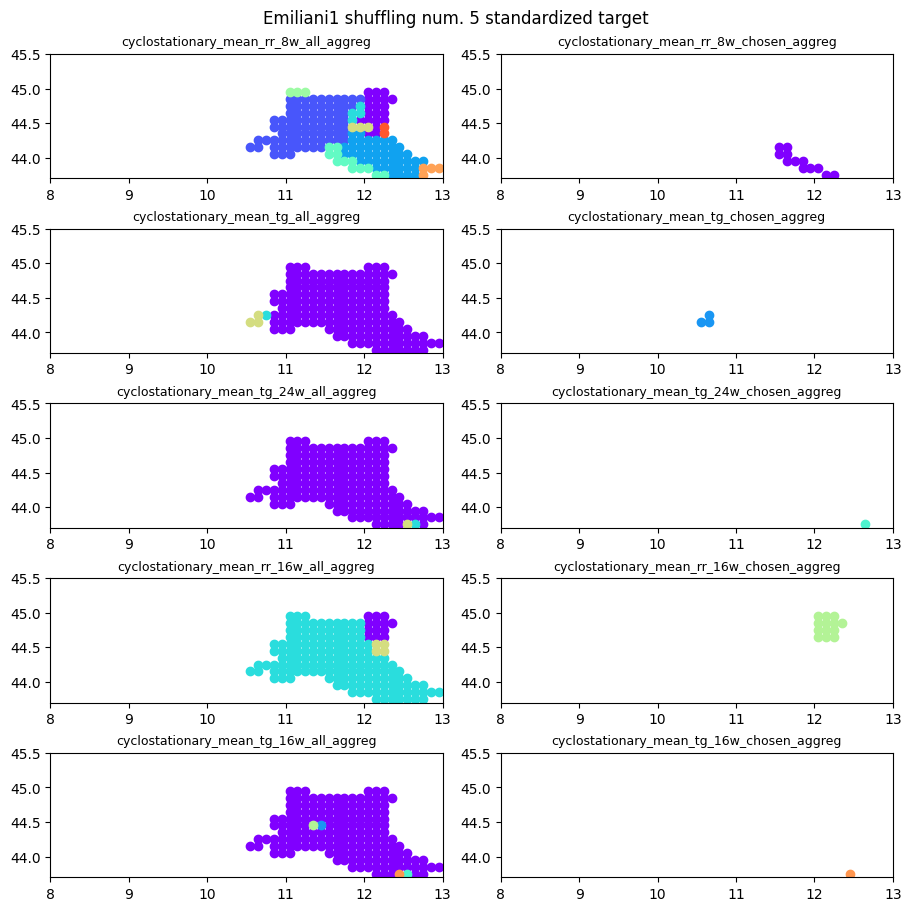

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [ ]:
plots_folder = './GenLinCFA/for_plots/'
basin = "Emiliani2"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

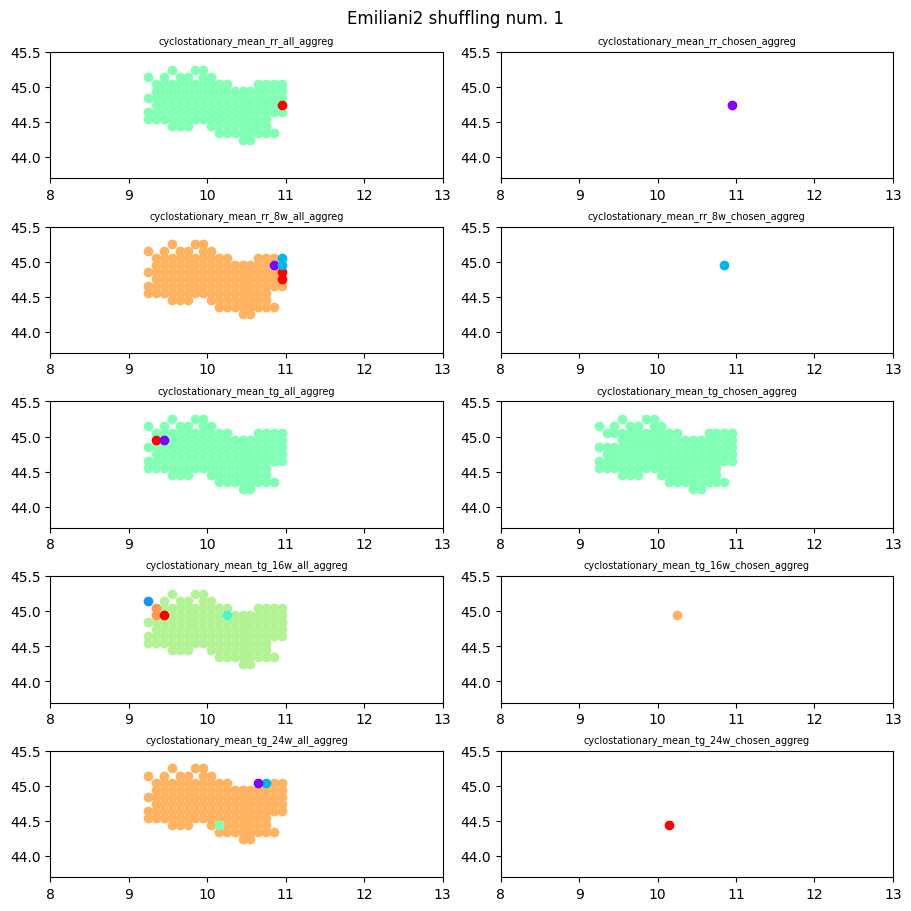

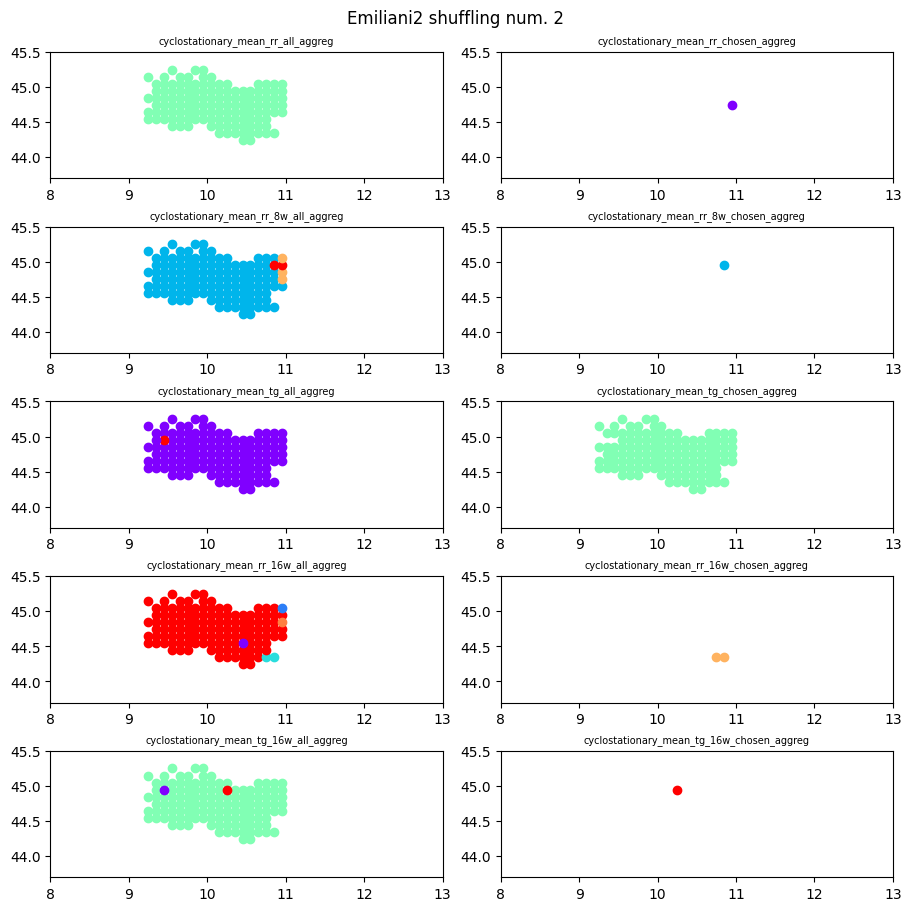

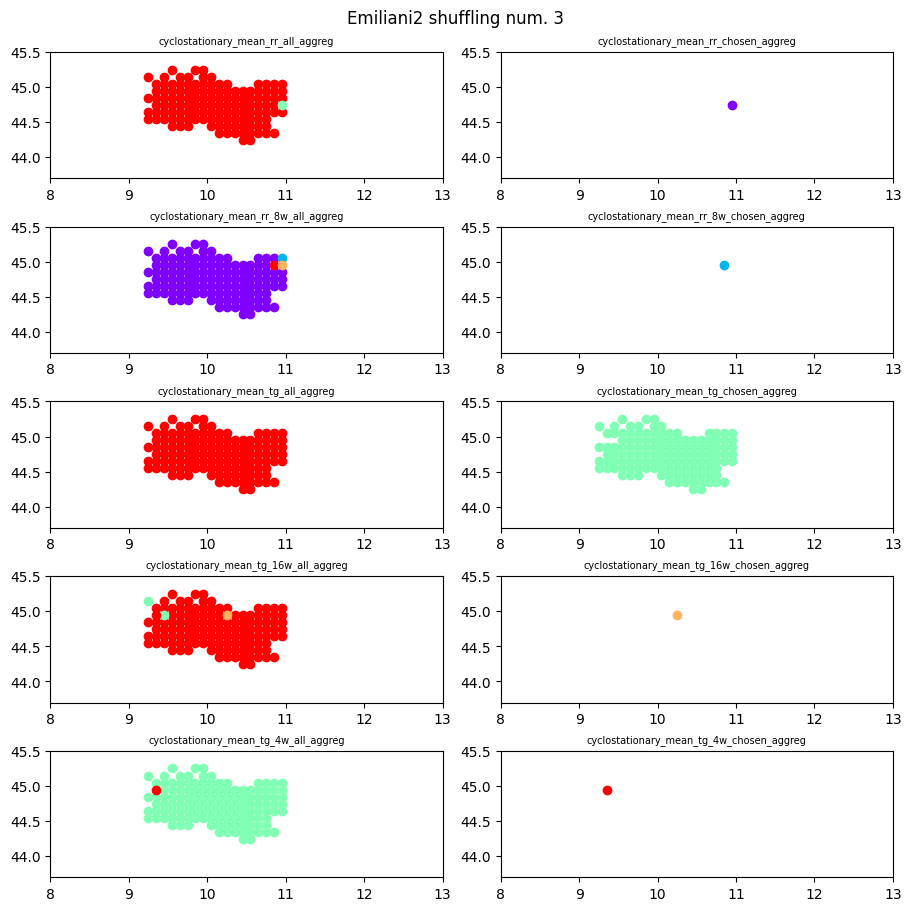

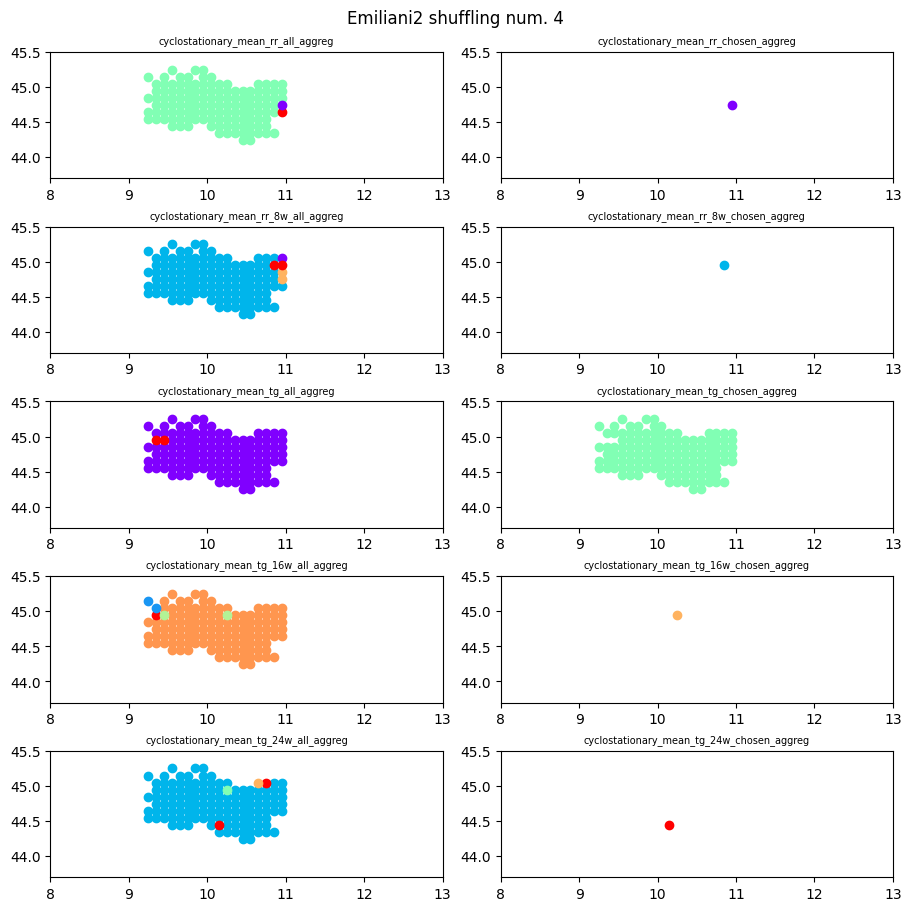

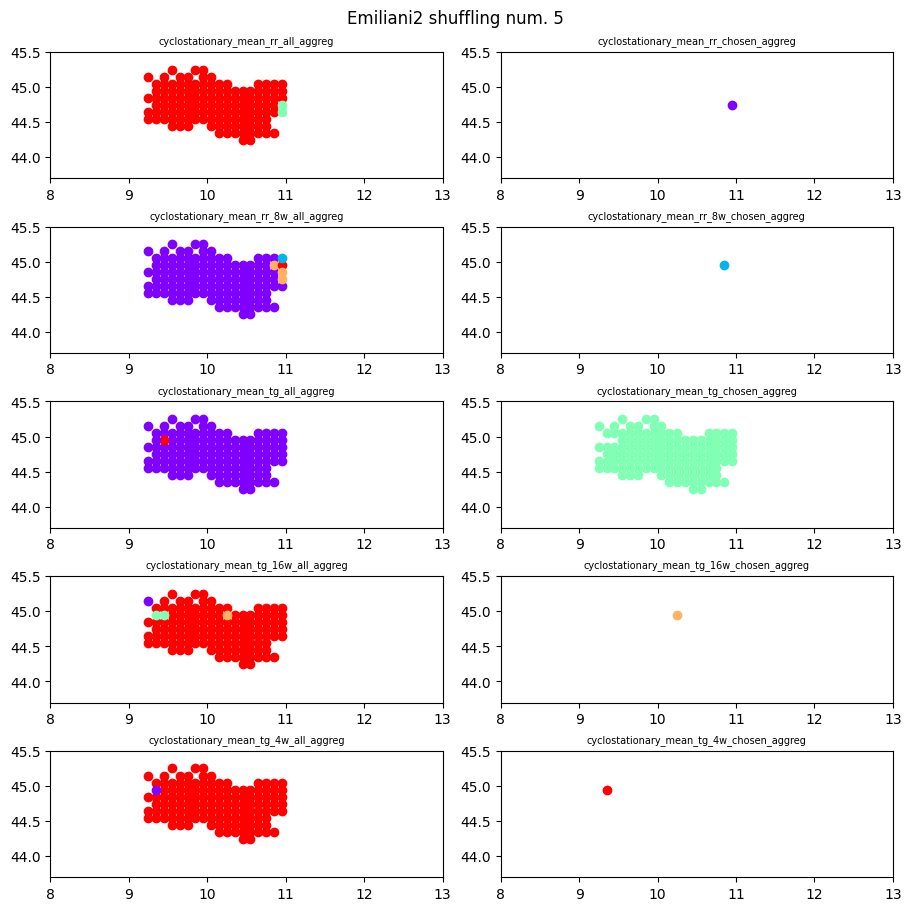

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [25]:
plots_folder = './GenLinCFA/for_plots/'
basin = "Garda_Mincio"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

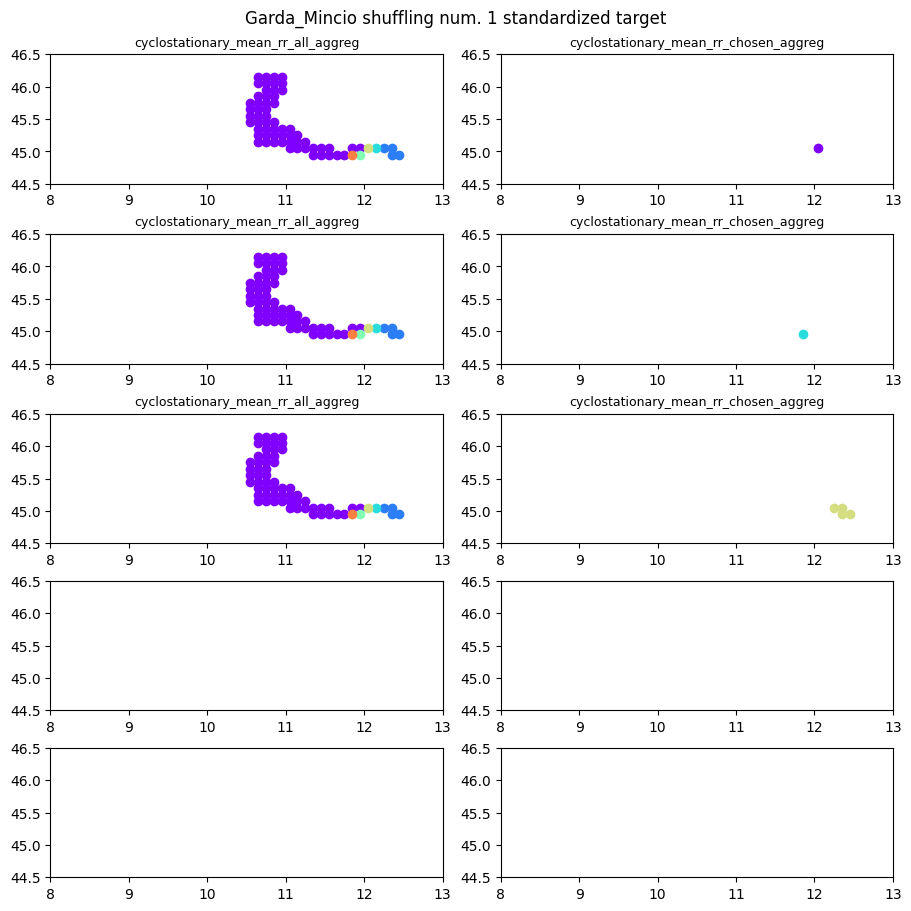

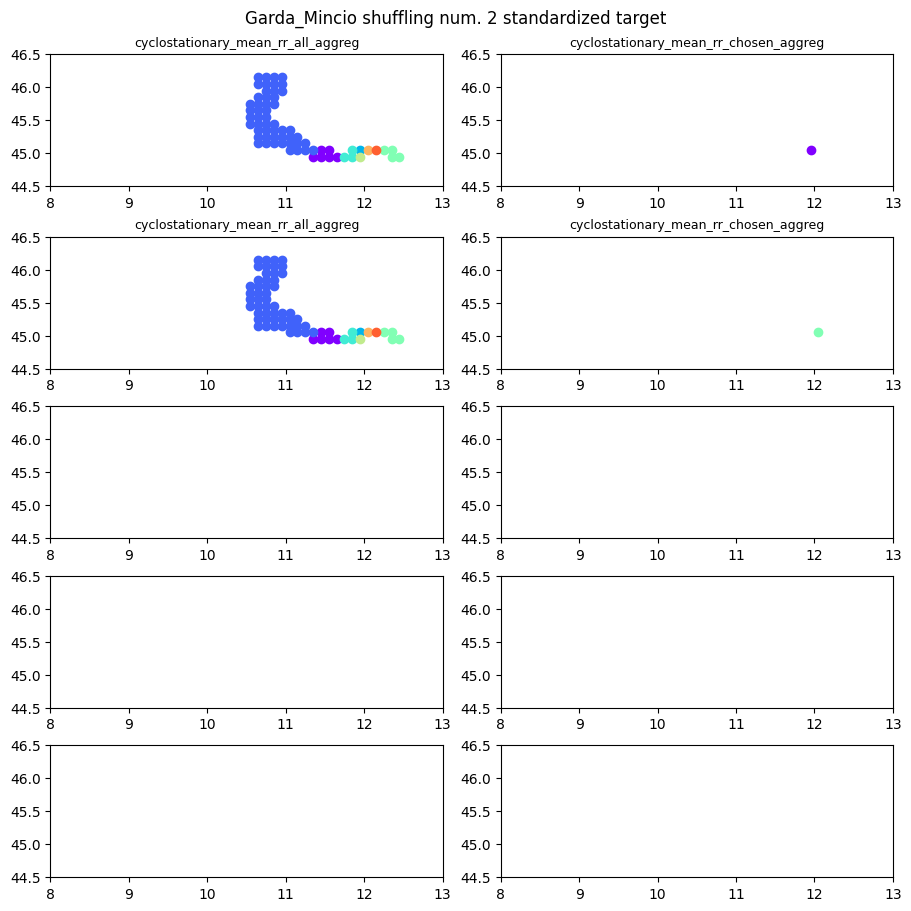

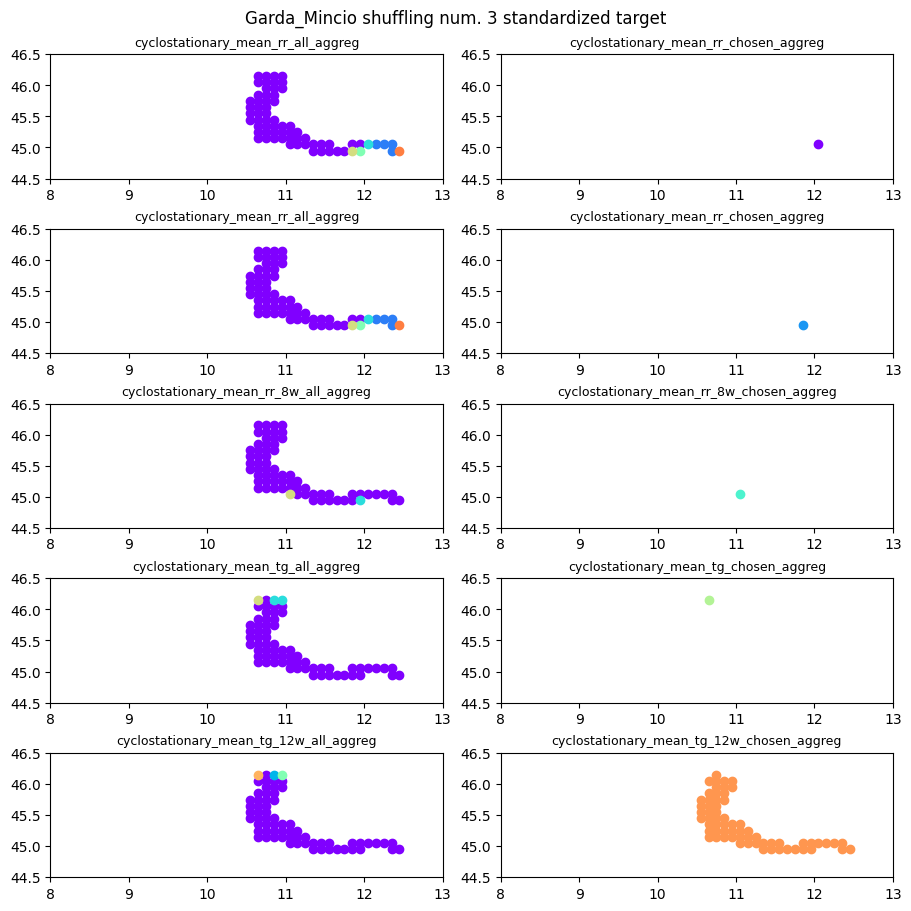

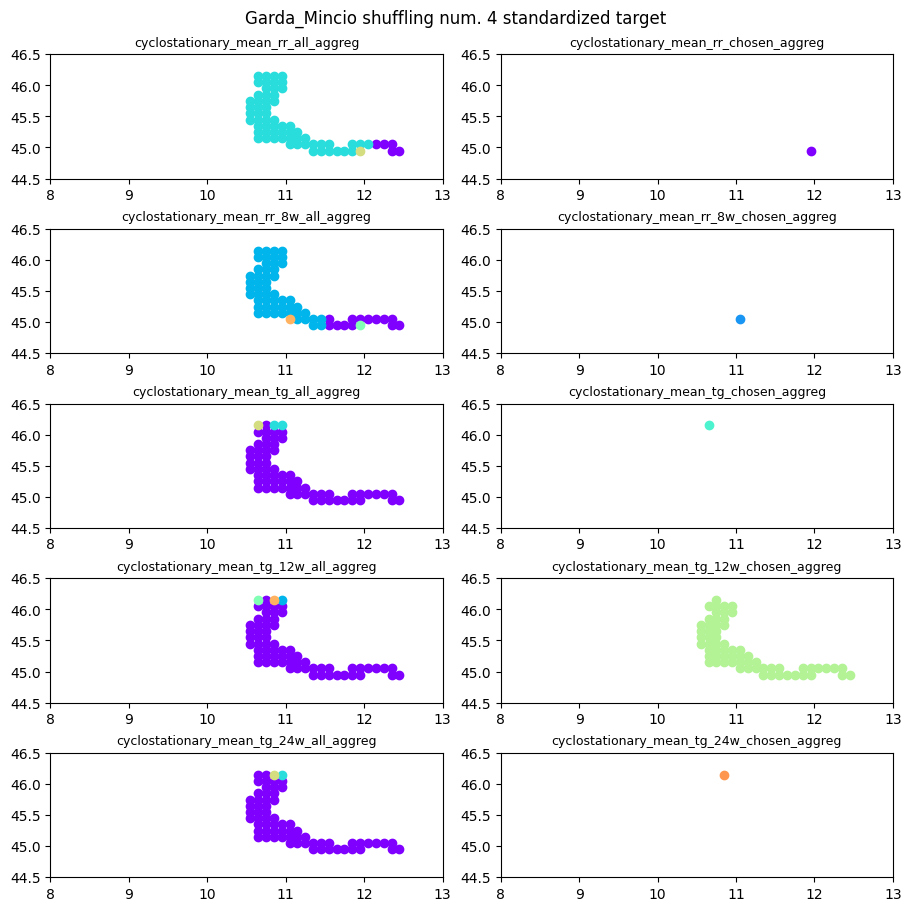

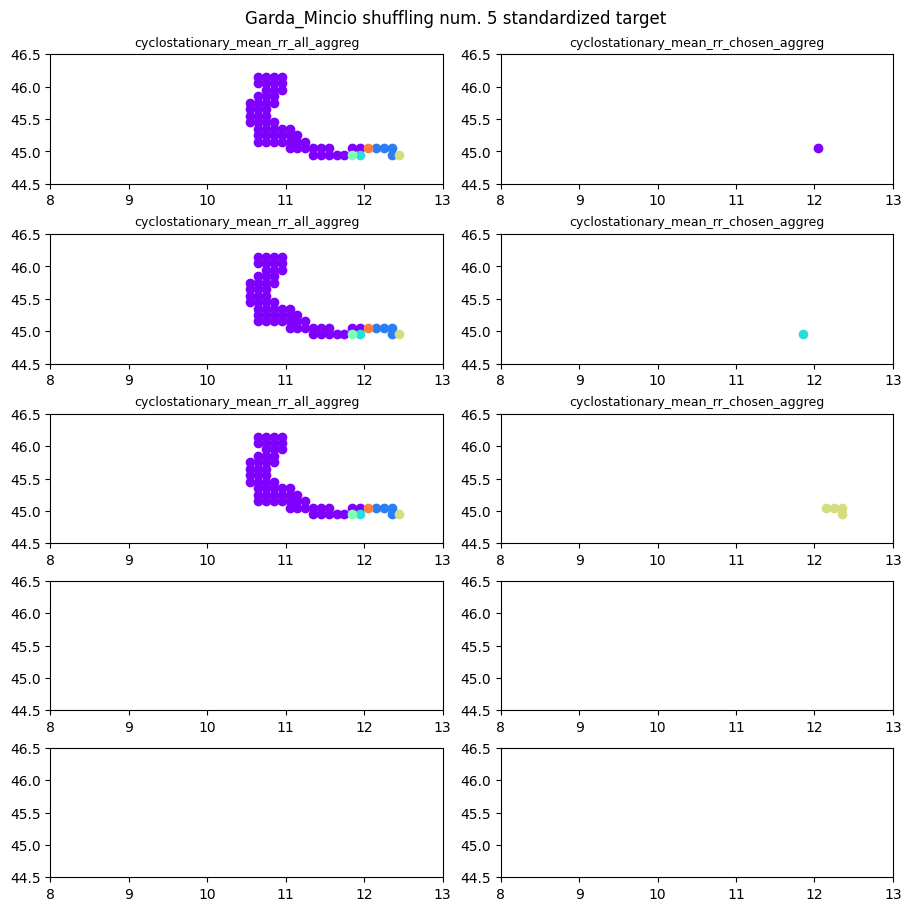

In [26]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=44.5, ymax=46.5, sample=i+1)

# Original target aggregations

In [ ]:
plots_folder = './GenLinCFA/for_plots_original_target/'
basin = "Emiliani1"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

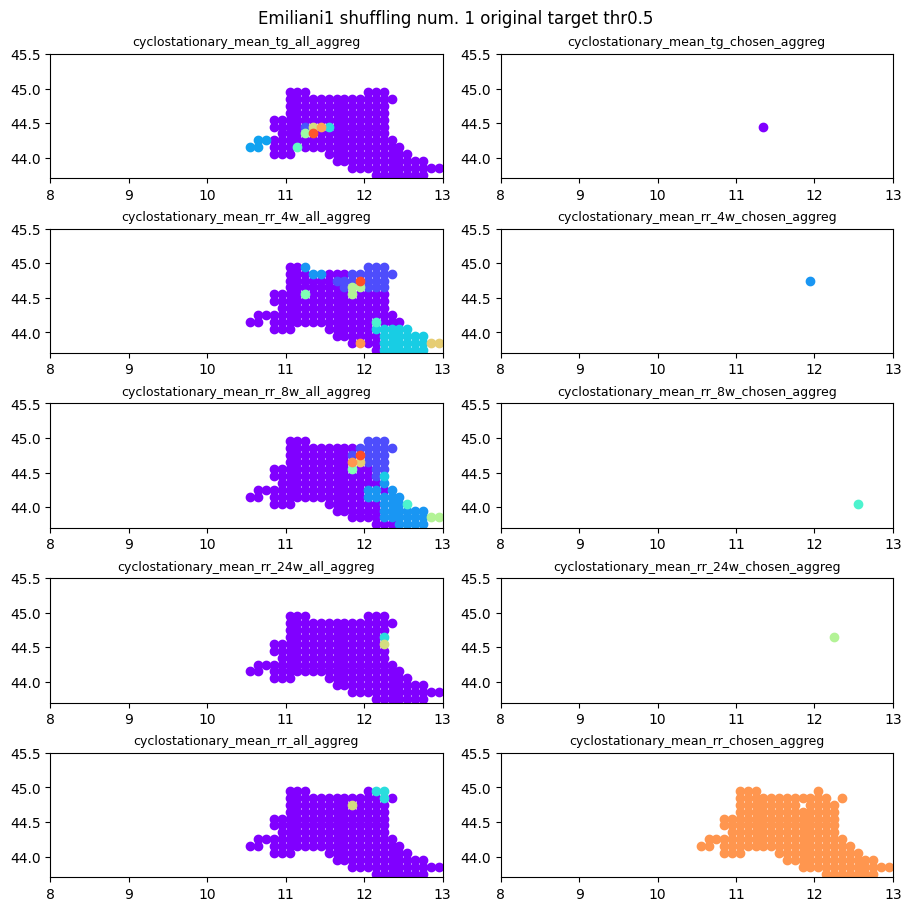

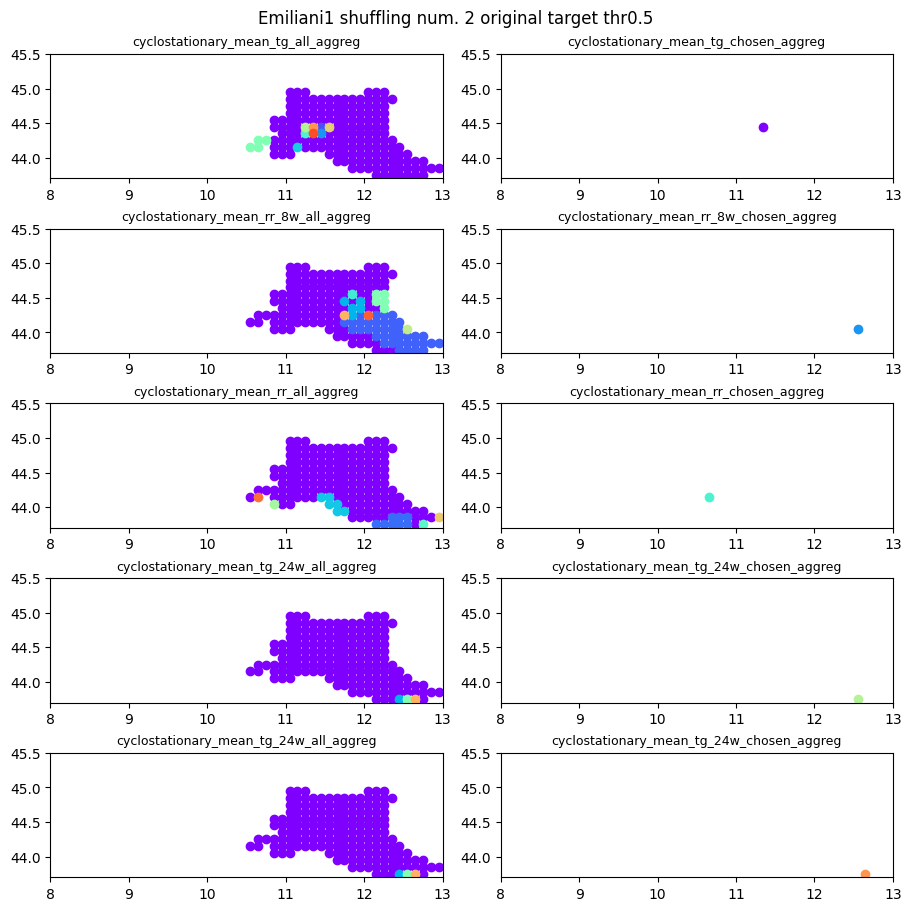

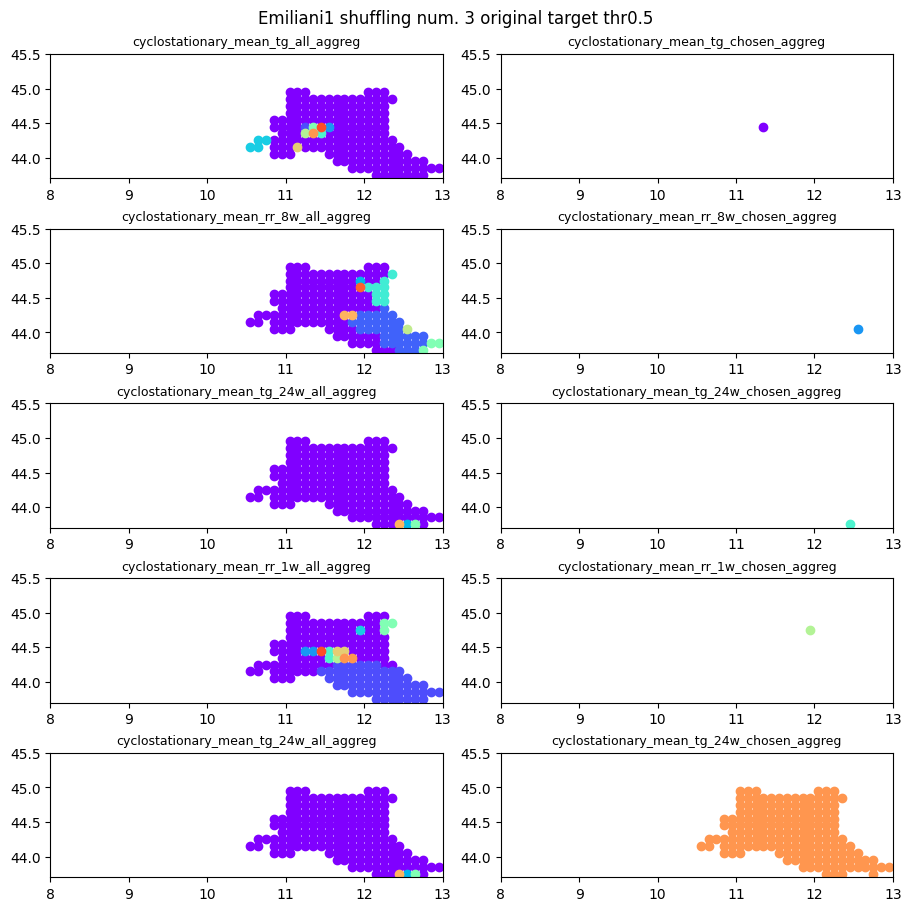

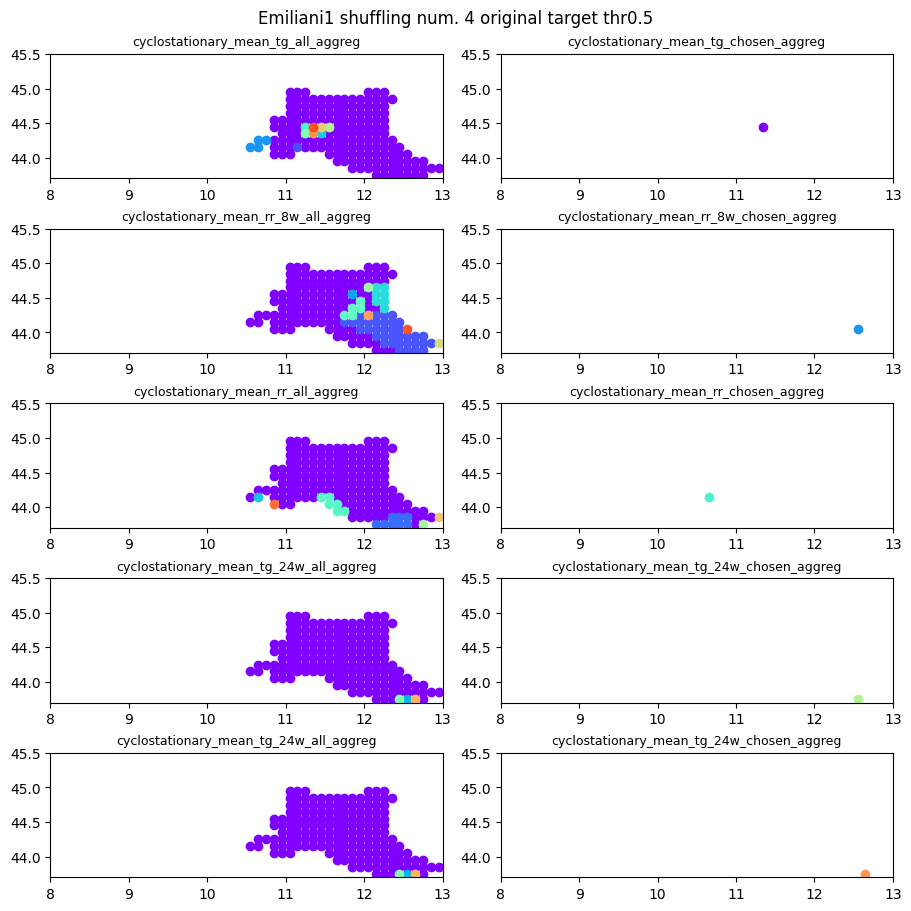

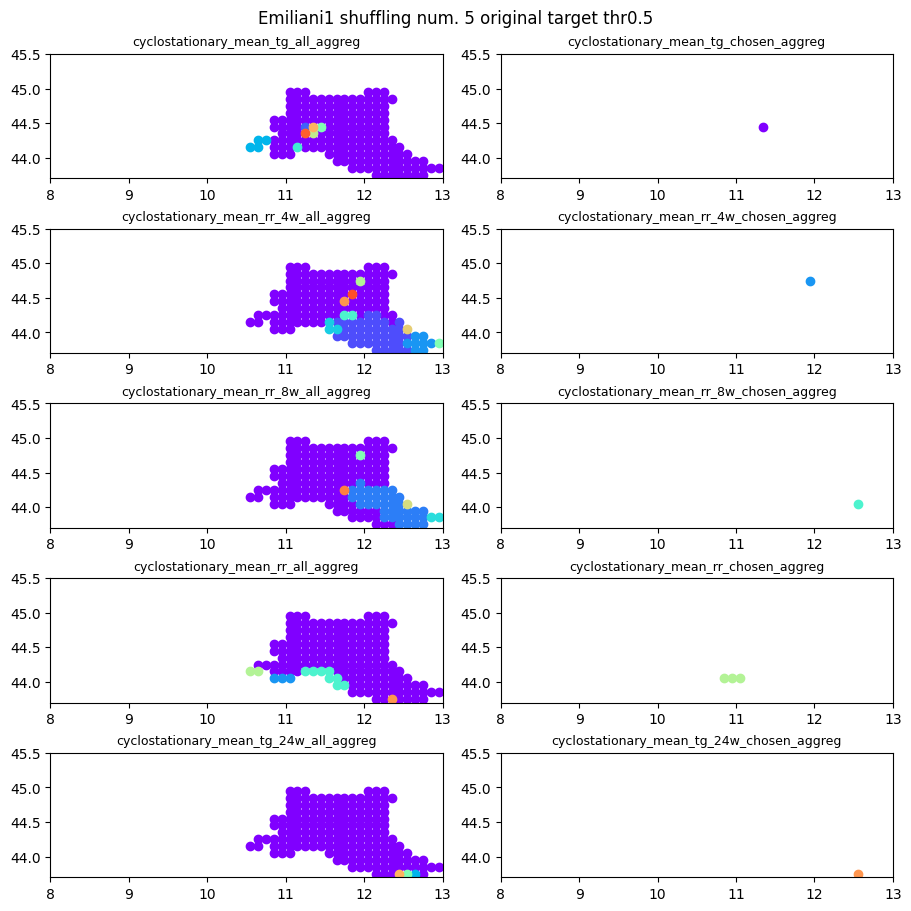

In [ ]:
for i in range(0, 5):
  selected_colnames  = [feature.replace('-', '_') for feature in selected_colnames_CMI5[i]]
  plot_cells(outputs[i],selected_colnames, xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [ ]:
plots_folder = './GenLinCFA/for_plots_original_target/'
basin = "Emiliani2"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

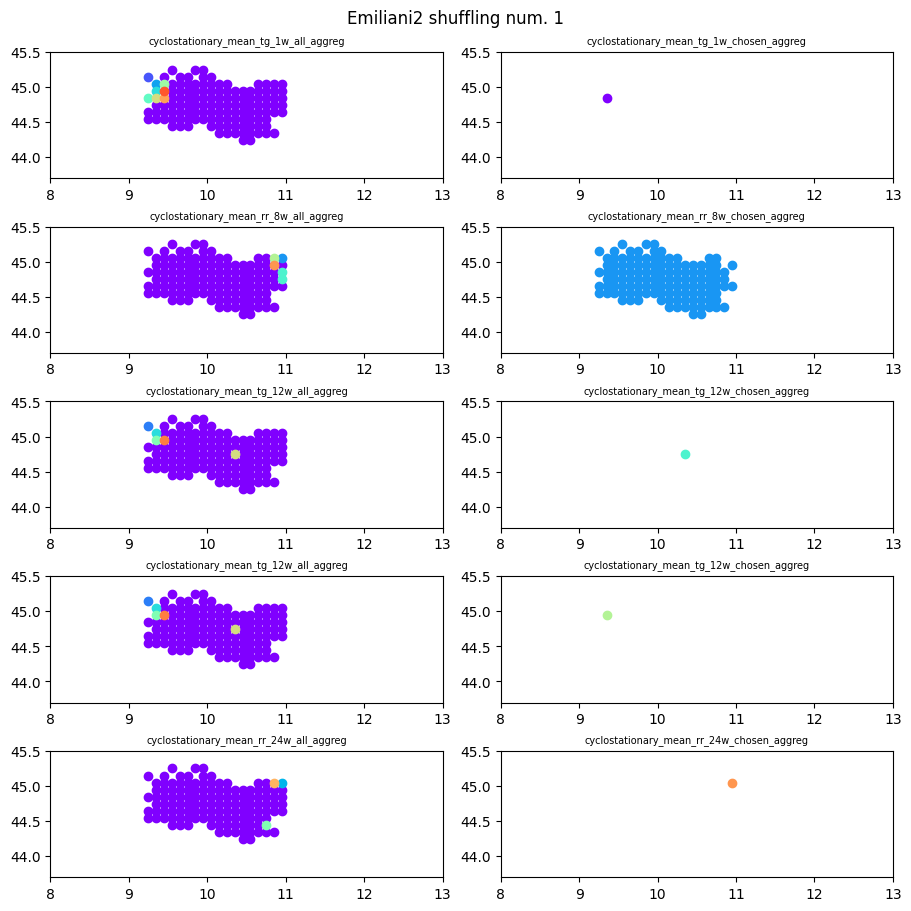

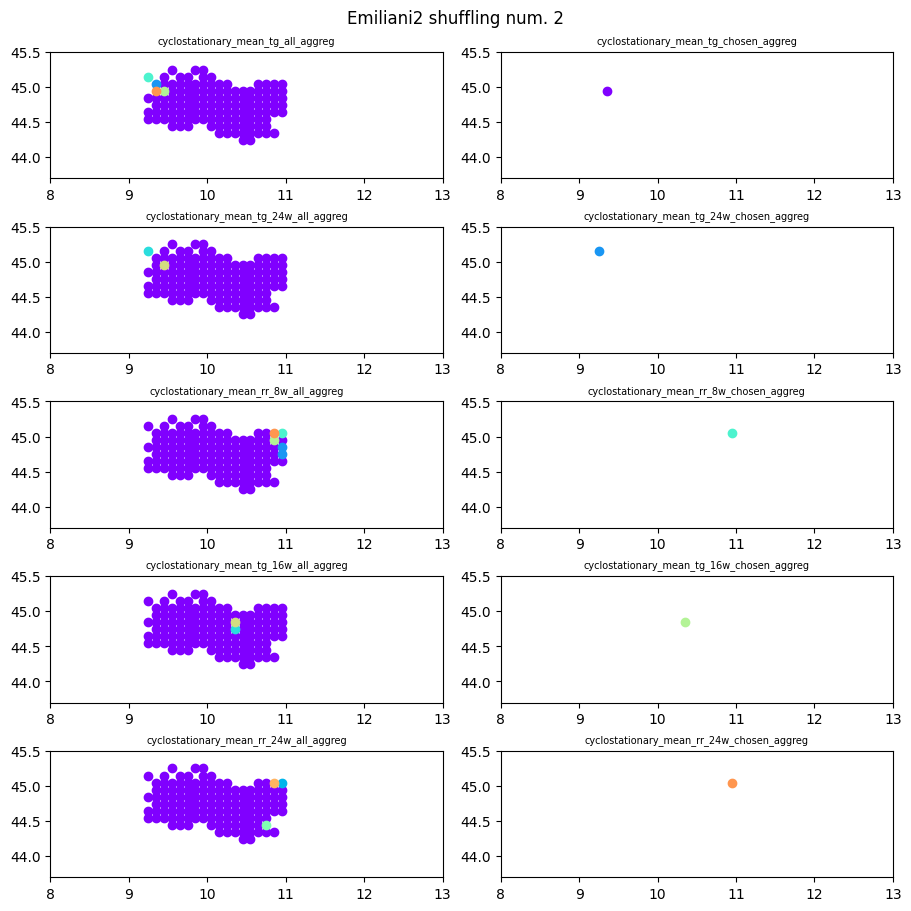

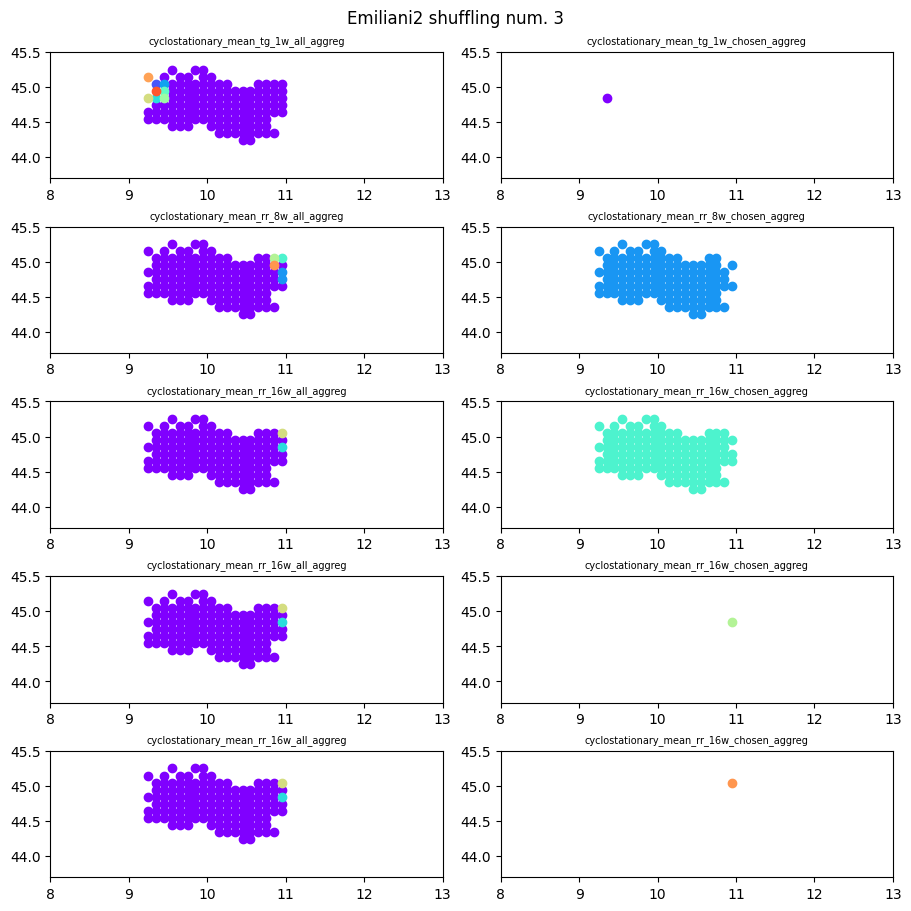

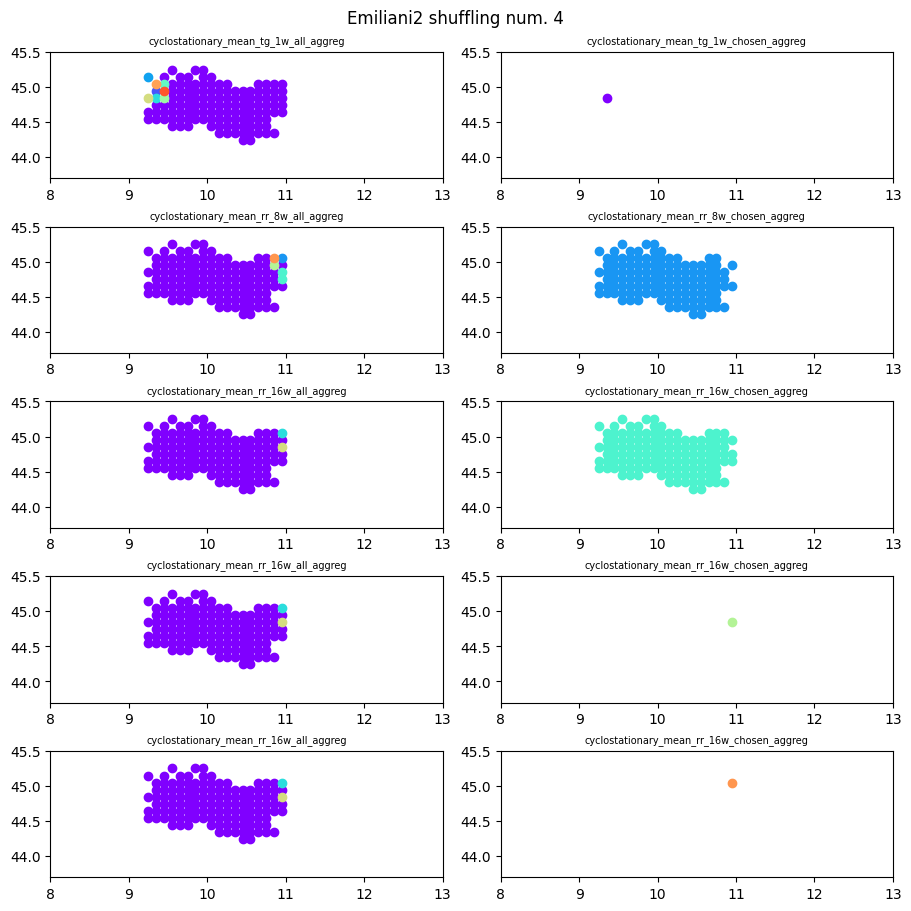

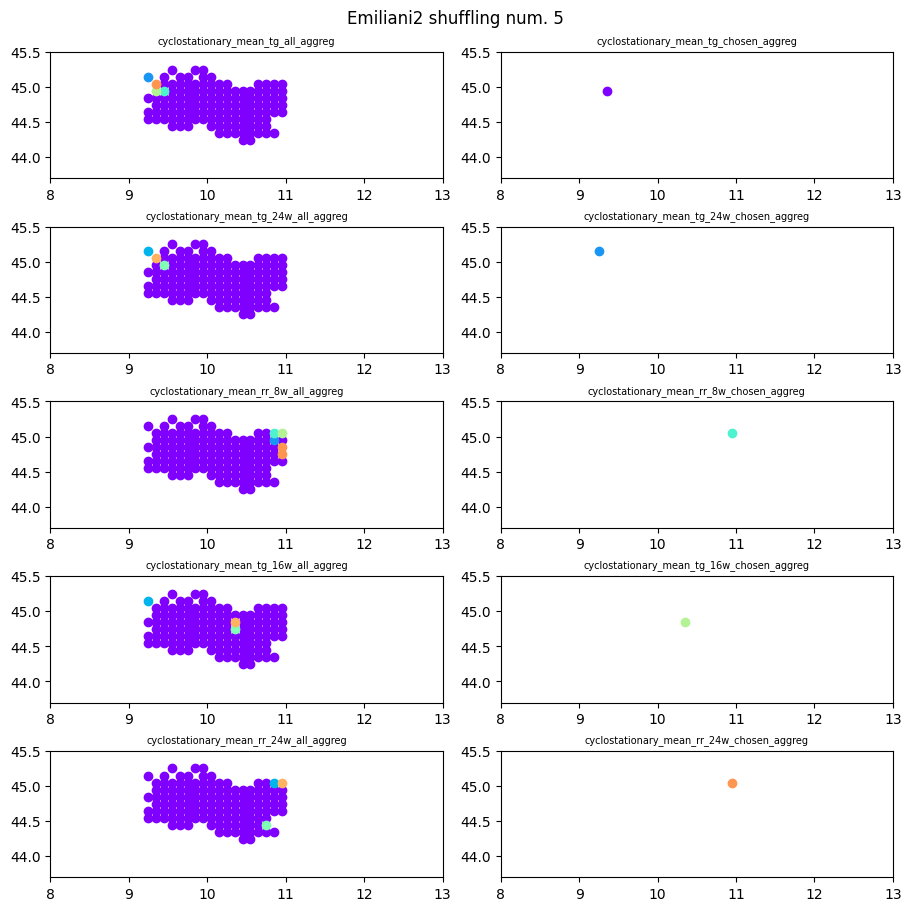

In [ ]:
for i in range(0, 5):
  selected_colnames  = [feature.replace('-', '_') for feature in selected_colnames_CMI5[i]]
  plot_cells(outputs[i],selected_colnames, xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [ ]:
plots_folder = './GenLinCFA/for_plots_original_target/'
basin = "Garda_Mincio"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

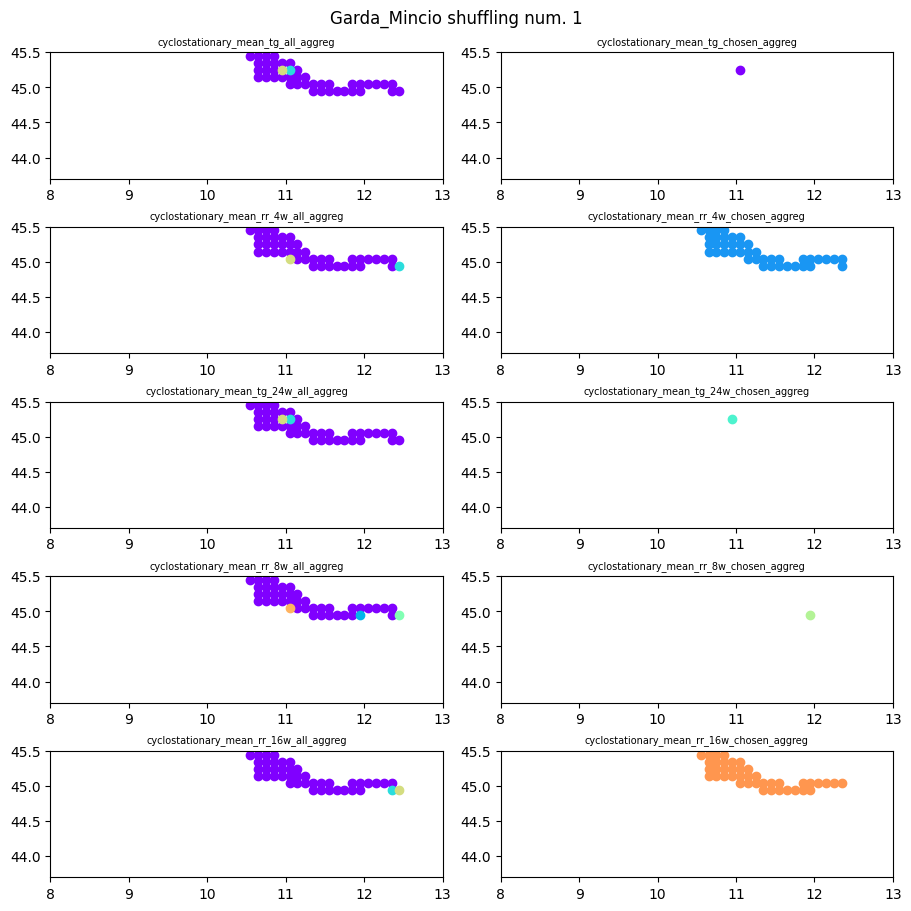

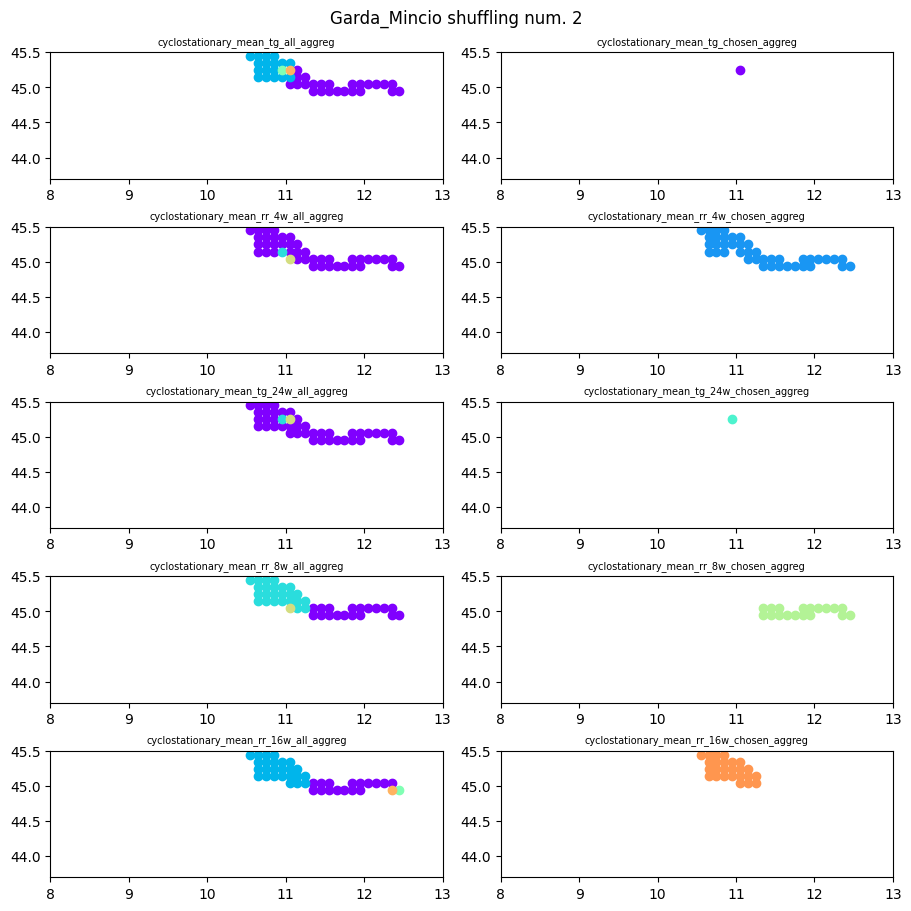

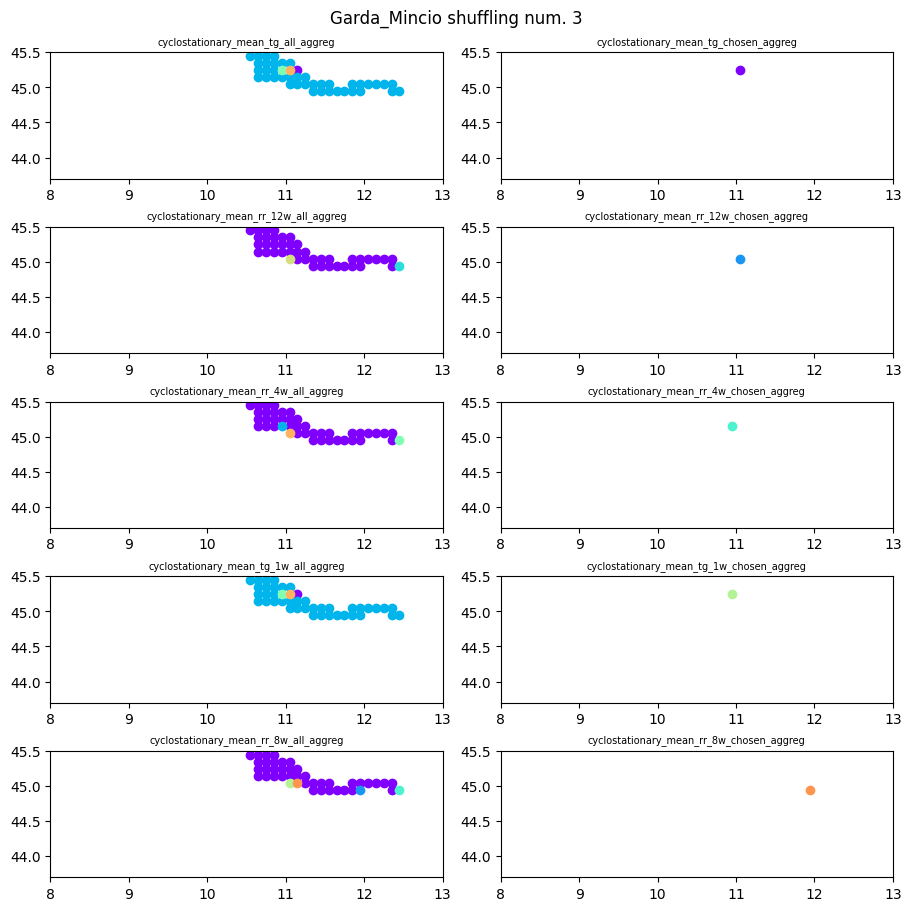

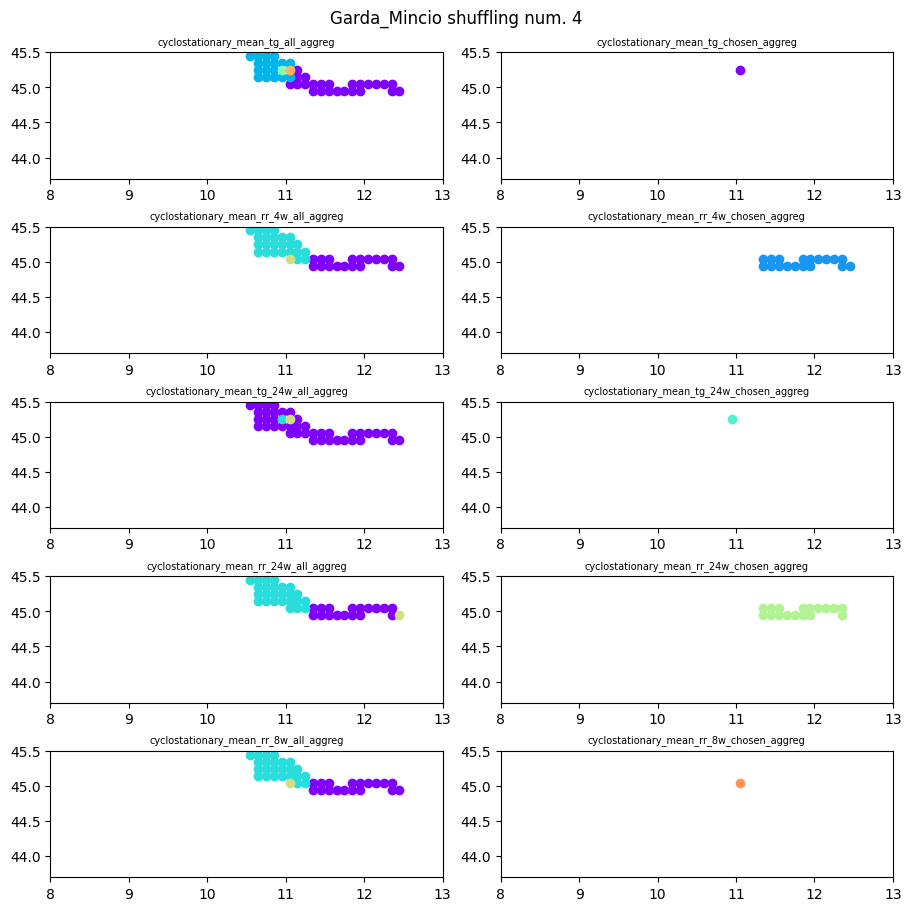

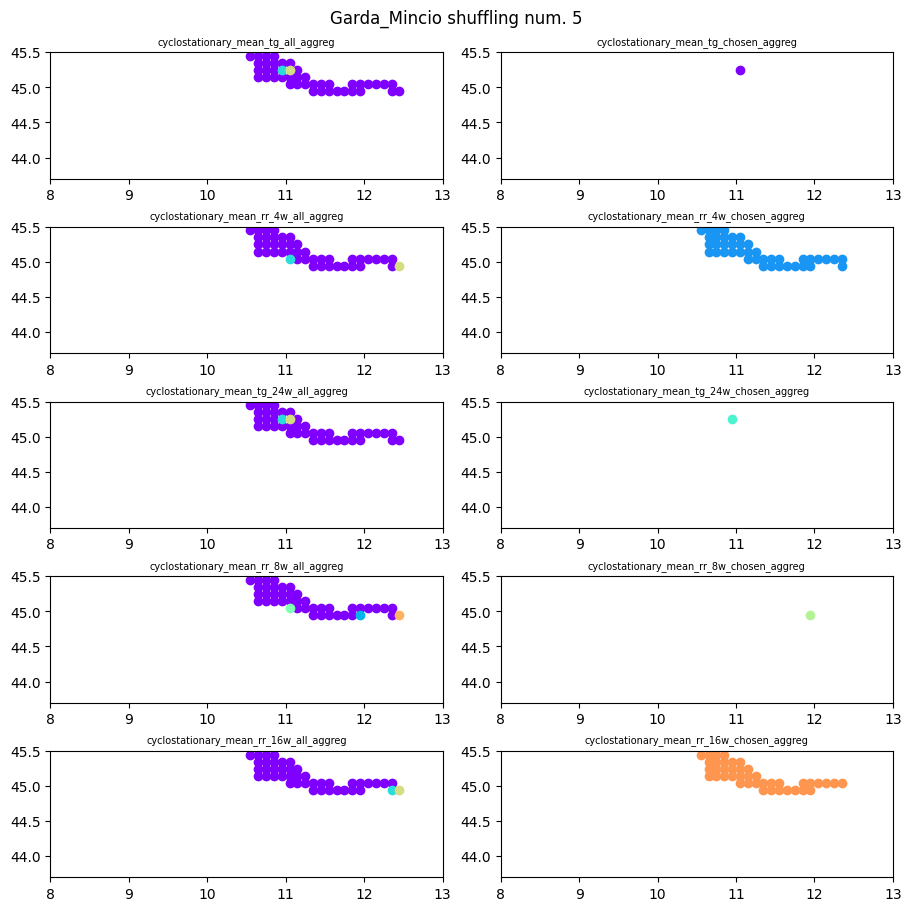

In [ ]:
for i in range(0, 5):
  selected_colnames  = [feature.replace('-', '_') for feature in selected_colnames_CMI5[i]]
  plot_cells(outputs[i],selected_colnames, xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

# Standardized target with moving avg 2 weeks aggregations

In [20]:
plots_folder = './GenLinCFA/for_plots_moving_avg_2/'
basin = "Emiliani1"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

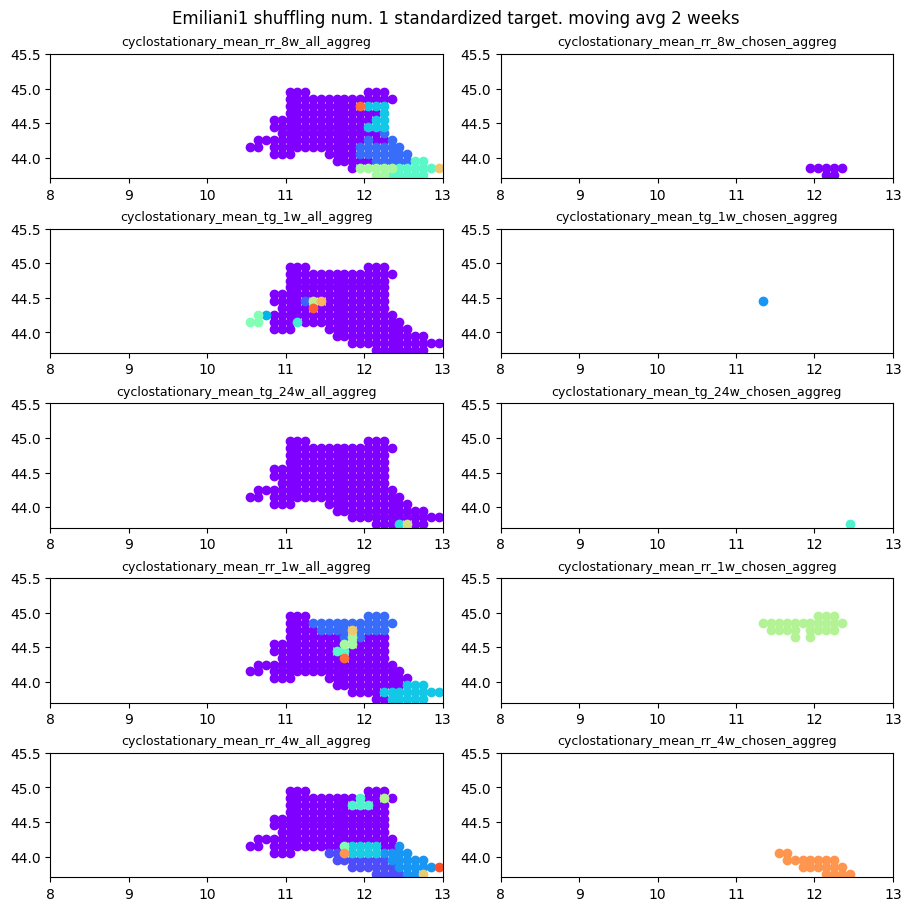

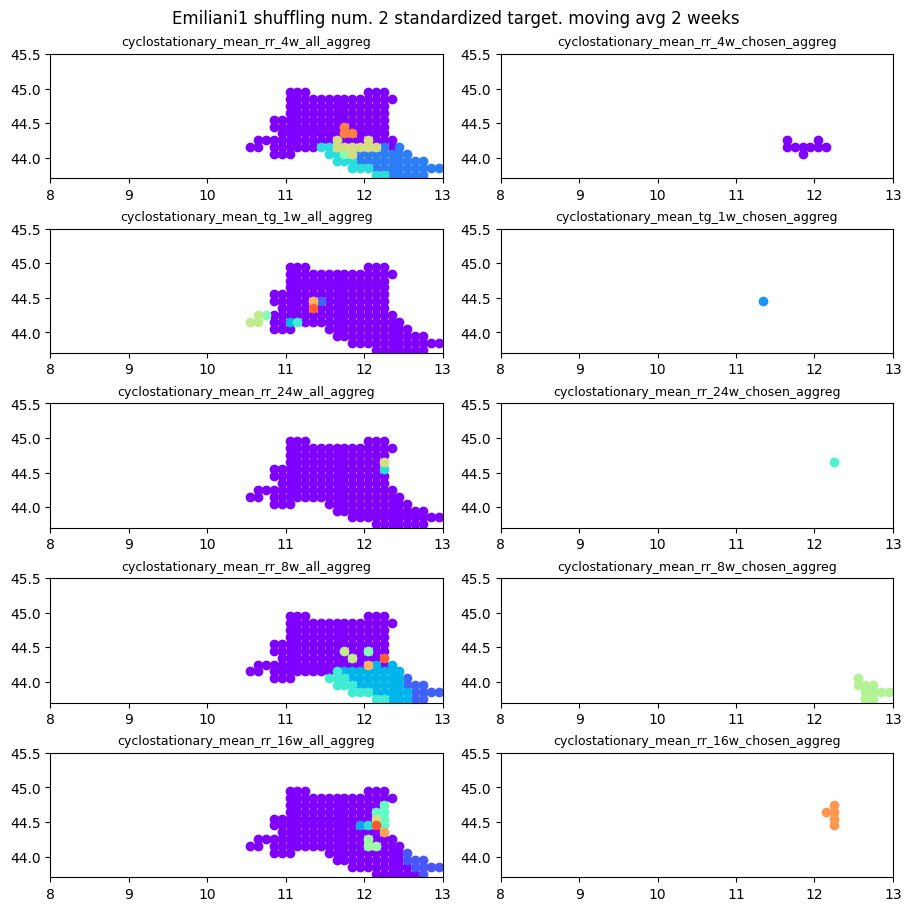

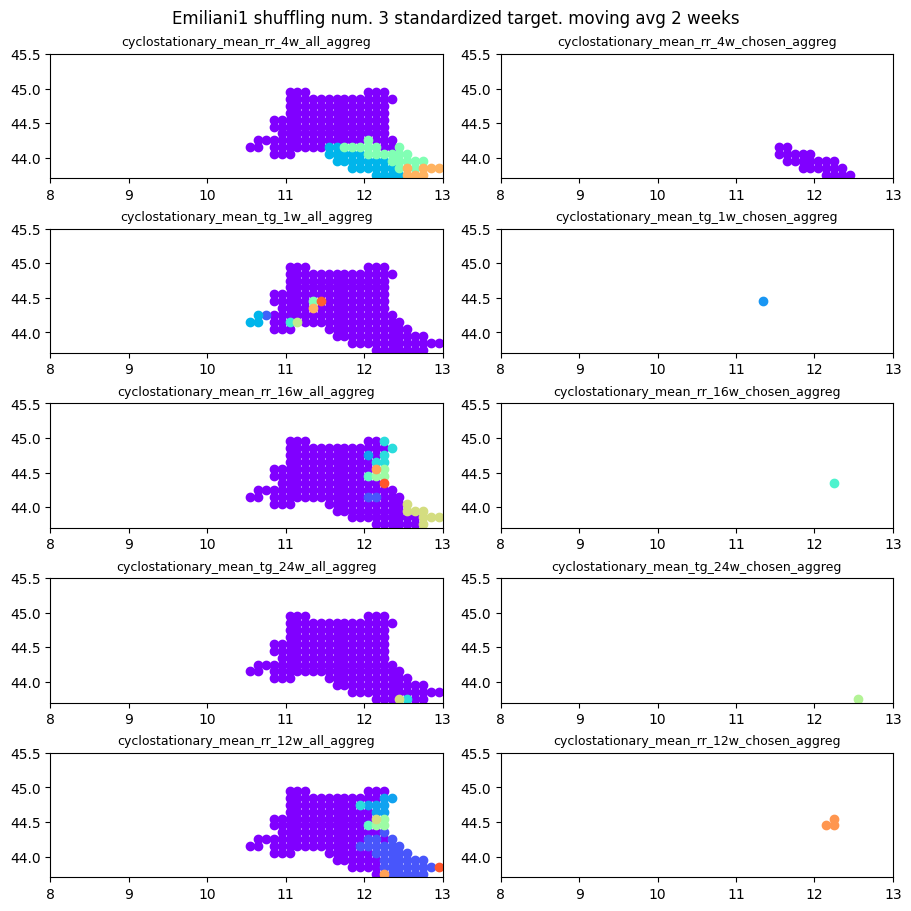

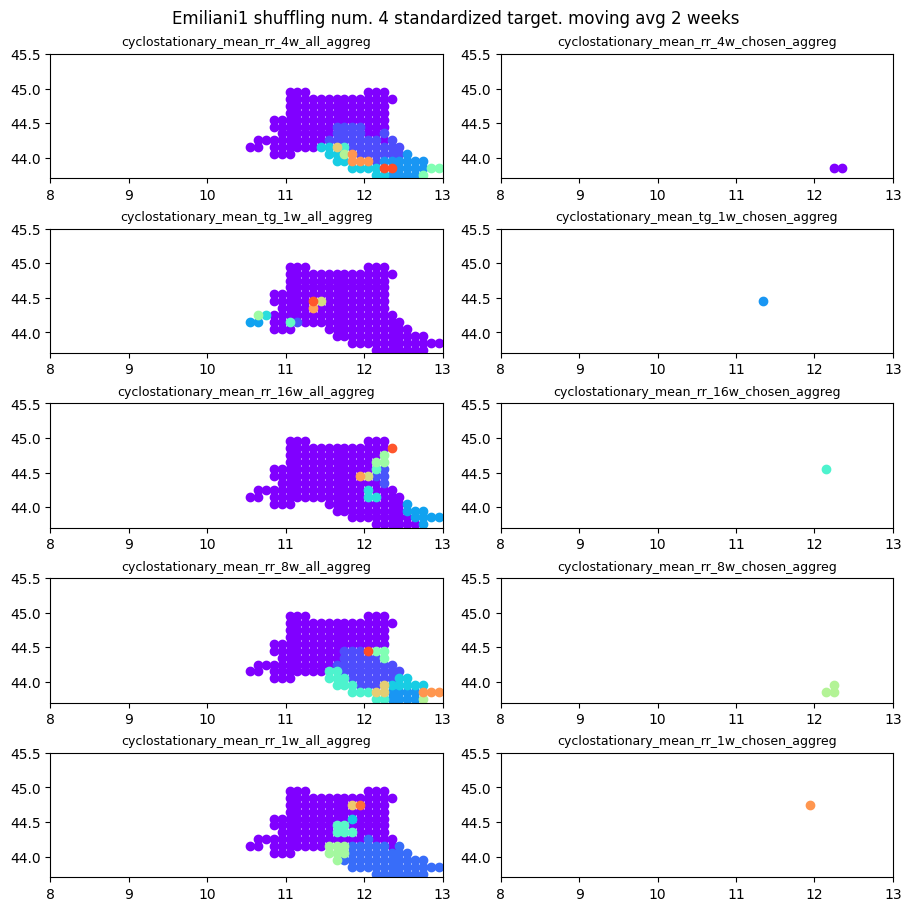

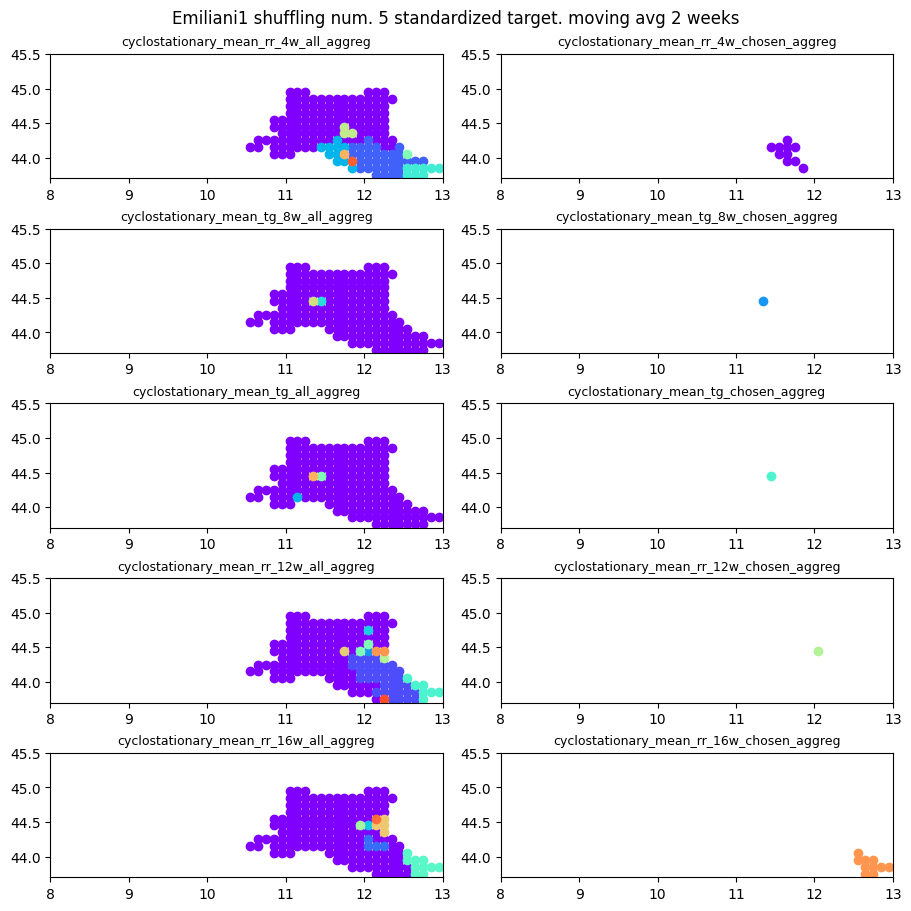

In [23]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [ ]:
plots_folder = './GenLinCFA/for_plots_moving_avg_2/'
basin = "Emiliani2"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

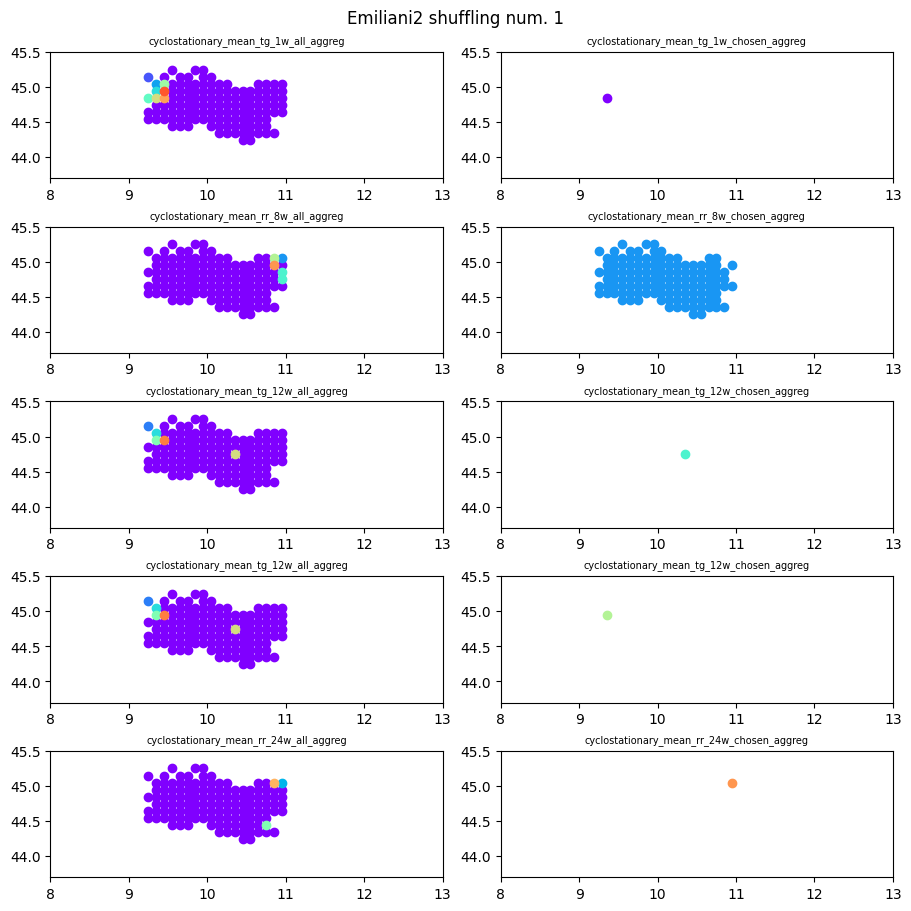

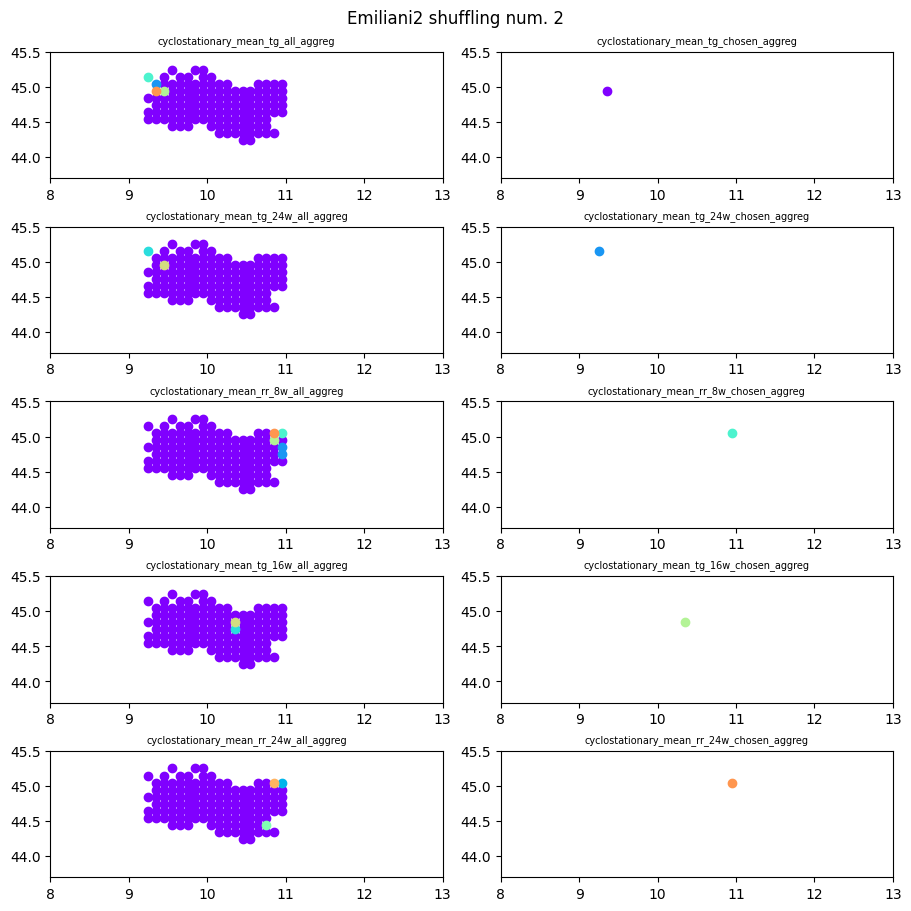

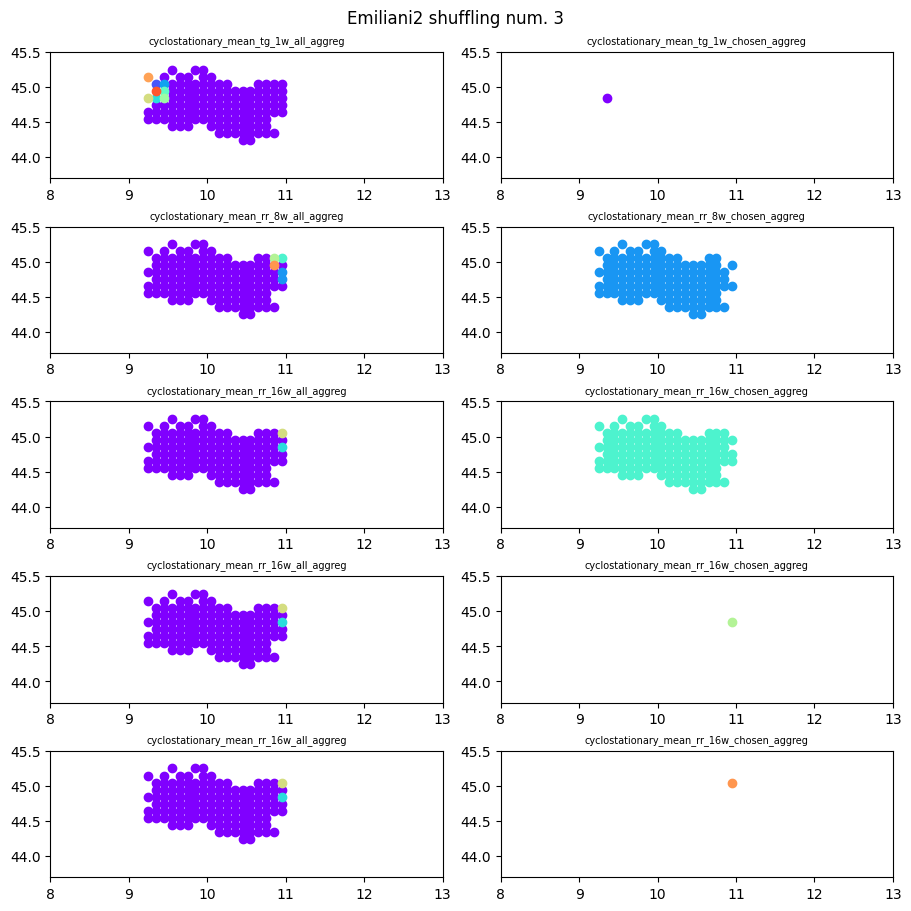

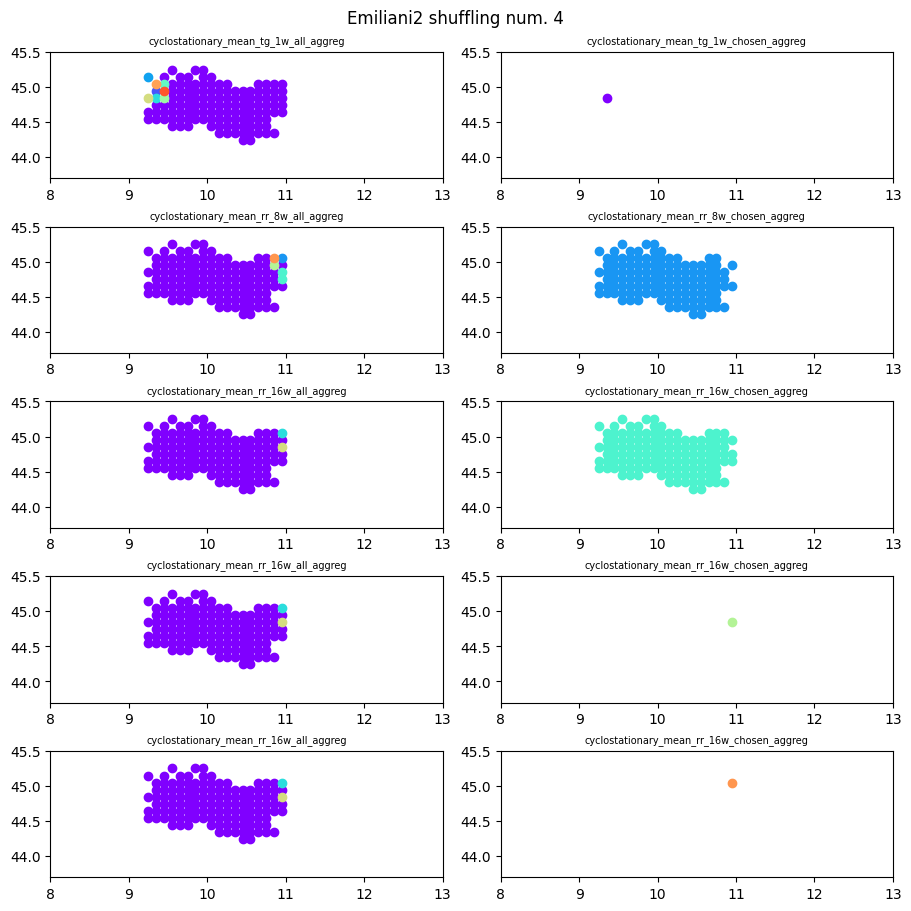

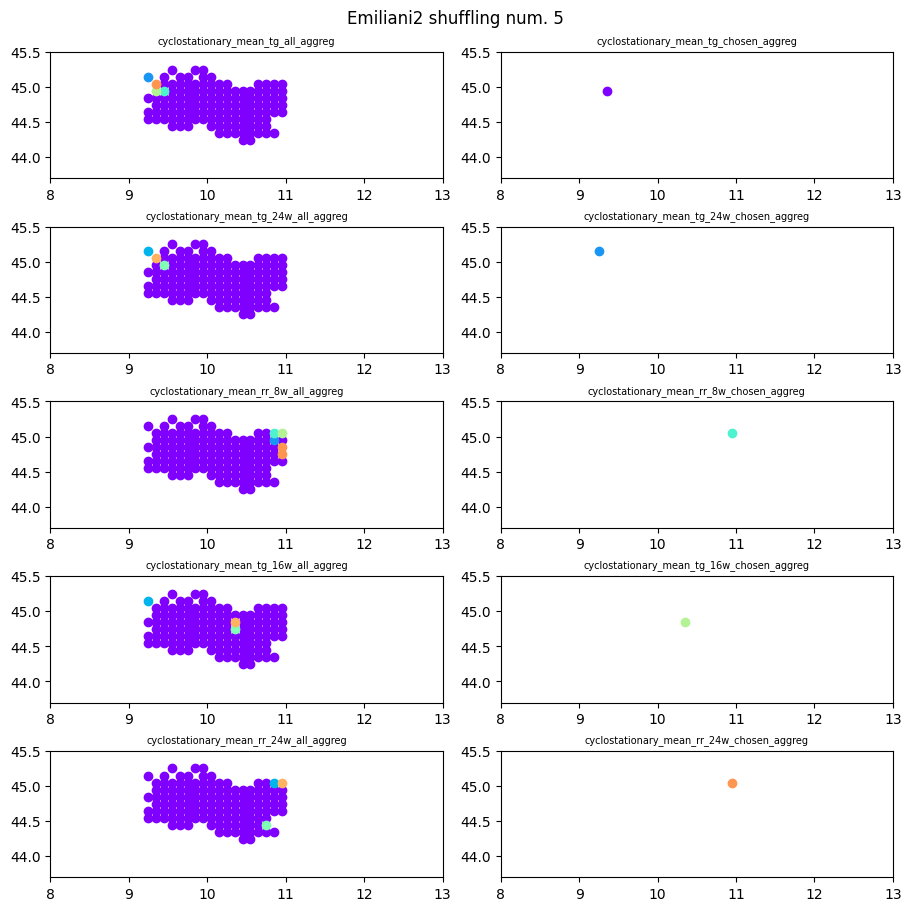

In [ ]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=43.7, ymax=45.5, sample=i+1)

In [34]:
plots_folder = './GenLinCFA/for_plots_moving_avg_2/'
basin = "Garda_Mincio"

outputs = np.load(plots_folder + basin + '_aggregations.npy', allow_pickle=True)
selected_colnames_CMI5 = np.load(plots_folder + basin + '_chosen_features.npy', allow_pickle=True)

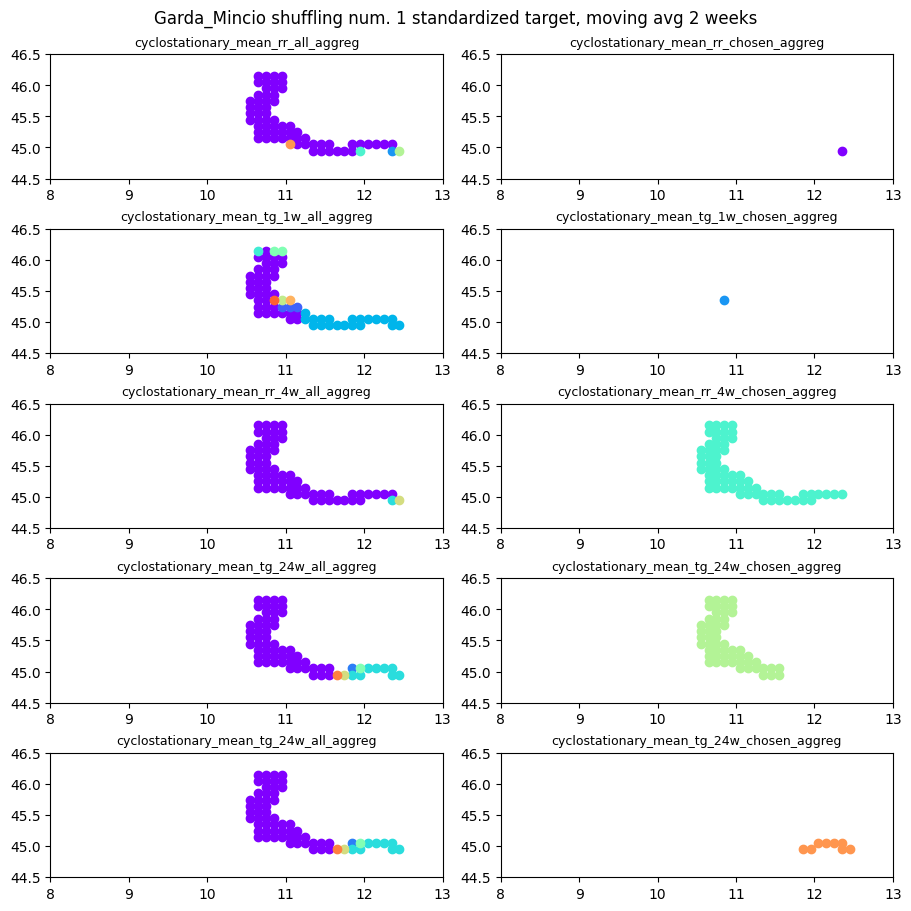

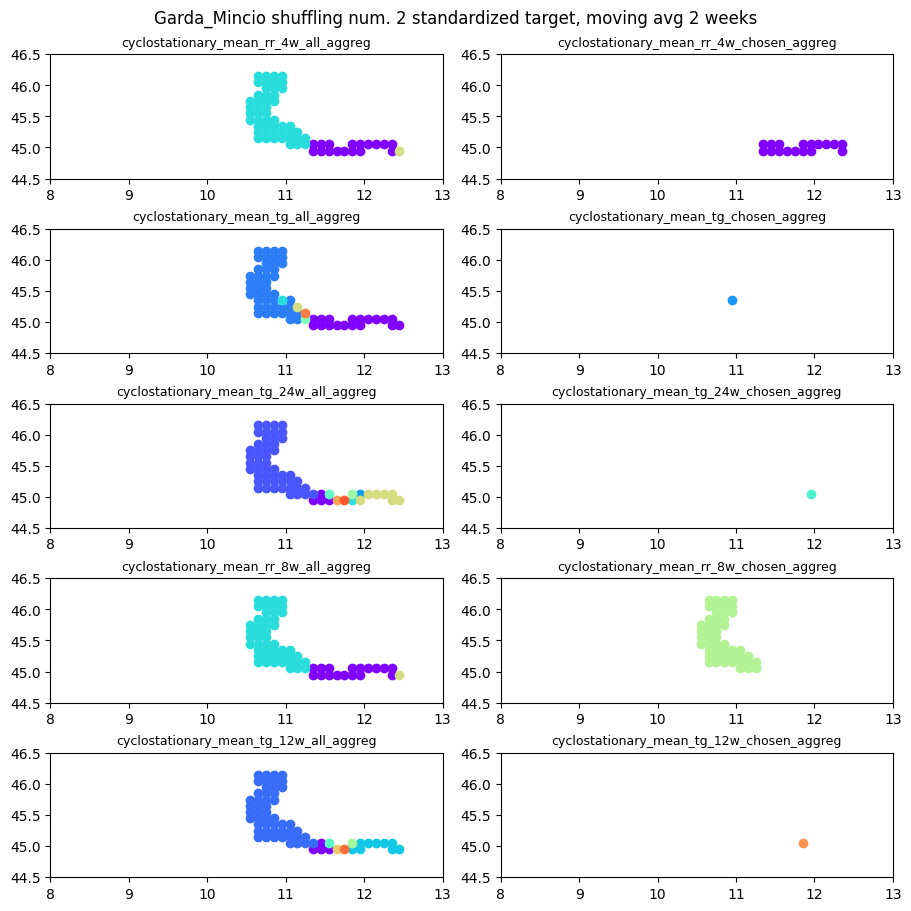

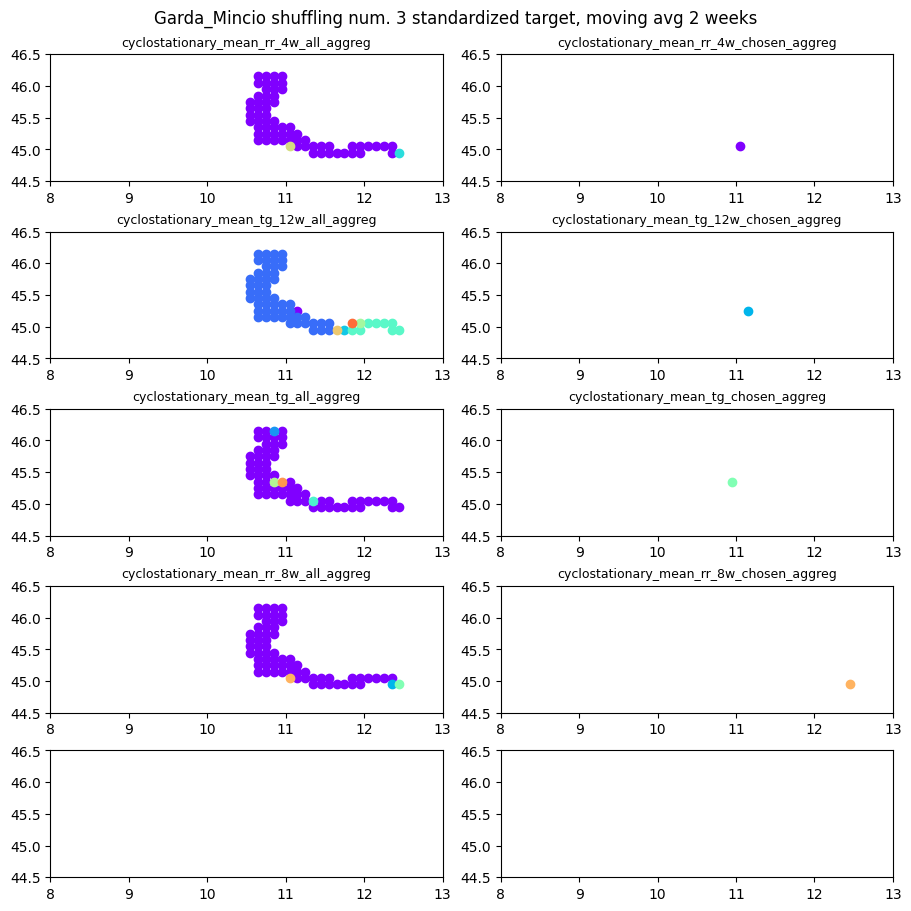

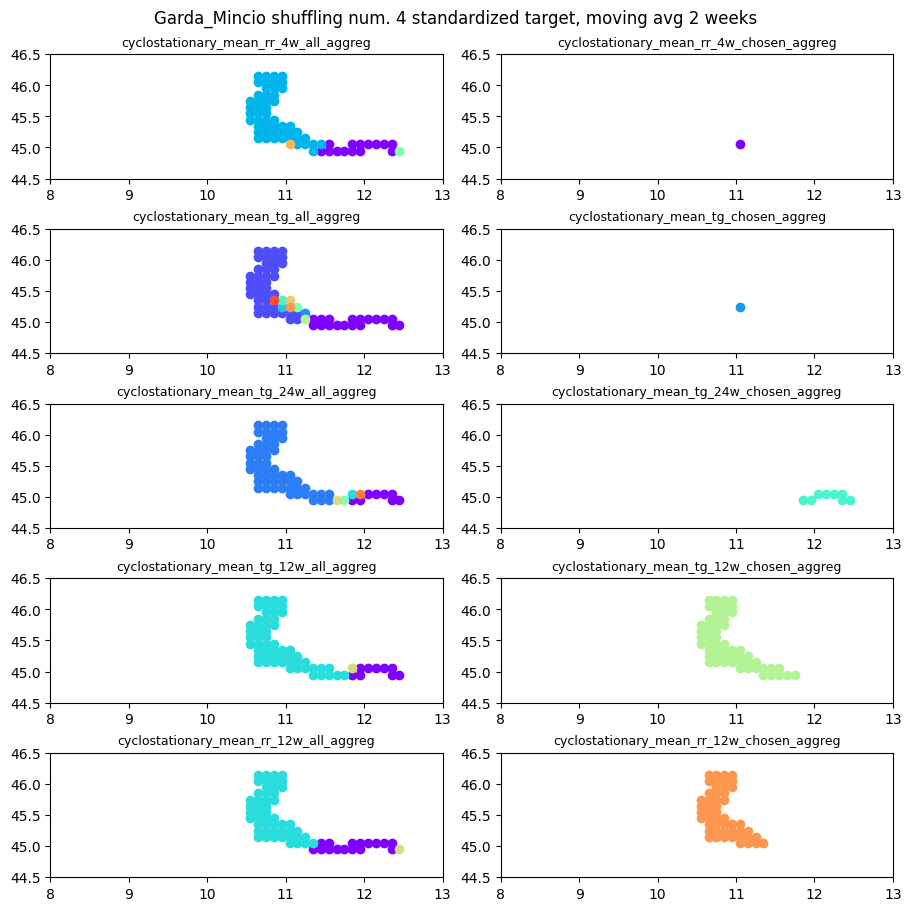

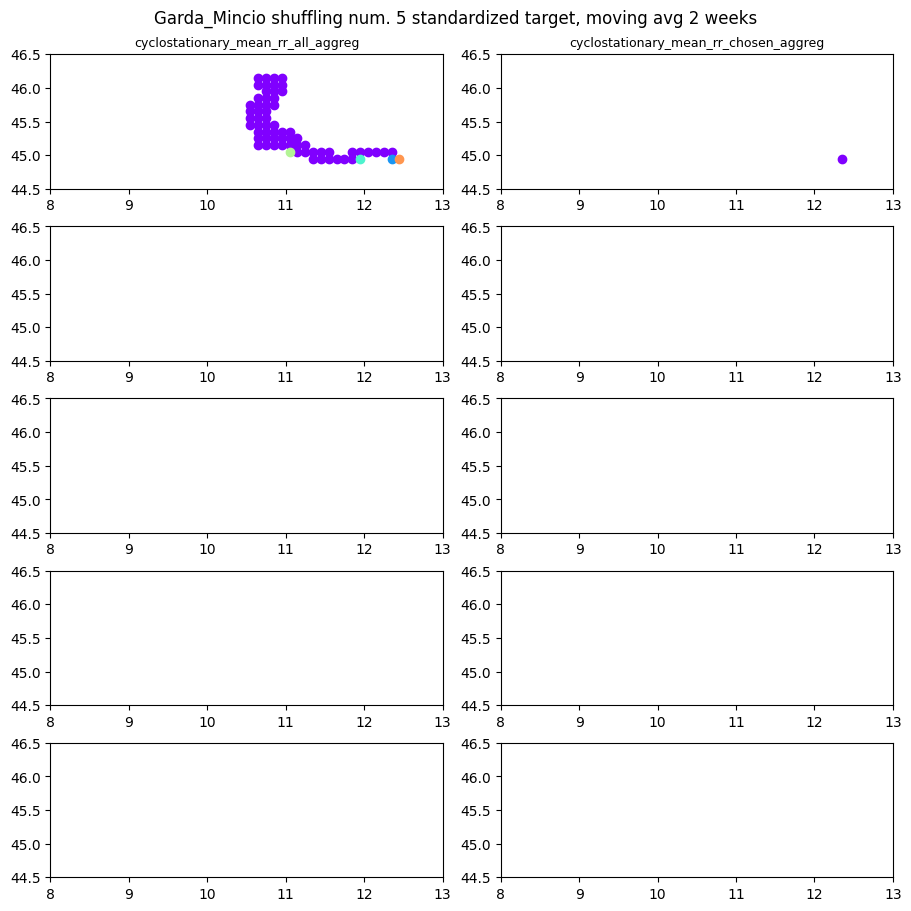

In [35]:
for i in range(0, 5):
  plot_cells(outputs[i],selected_colnames_CMI5[i], xmin=8, xmax=13, ymin=44.5, ymax=46.5, sample=i+1)